In [8]:
from os import path, sys, walk, listdir
import subprocess
from time import sleep
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict, deque
import bisect
import math
import whois
import scipy
import ipwhois
import re
import socket
from collections import Counter
from copy import deepcopy

# Preprocess

In [9]:
#get all path of .pcap file
cnt = 0
paths_pcap = []
for f in walk(sys.path[0]):
    cnt += 1
    folder_name = f[0]
    for iterable in f:
        if type(iterable) is list:
            for item in iterable:
                if not item.endswith('_nodup.pcap'):
                    continue
                if item.split(".")[-1] == 'pcap':
                    file_path = folder_name + "/"+ item
                    paths_pcap.append(file_path)
                    
path.exists(paths_pcap[0])

True

In [3]:
print(len(paths_pcap))

651


In [4]:
paths_pcap[0]

'/Users/kuangwenyi/Documents/Development/master-research/activations-final1a/[S12.Ep8] The Big Bang Theory - The Consummation Deviation/echodot_nodup.pcap'

In [5]:
#test pyshark
#r = pyshark.FileCapture(paths_pcap[0])

In [6]:
paths_pcap[0]

'/Users/kuangwenyi/Documents/Development/master-research/activations-final1a/[S12.Ep8] The Big Bang Theory - The Consummation Deviation/echodot_nodup.pcap'

In [10]:
def generate_res_path(path):
    res_path = path[:-5] + ".txt"
    return res_path

In [8]:
# process = subprocess.Popen(['tshark', '-r', '/Users/kuangwenyi/Documents/Development/activation-camera/activation-camera/[S2.Ep9] Narcos - Nuestra Finca_00469_00470_echodot_camera_2b/echodot.pcap'], stdout=subprocess.PIPE, stderr=subprocess.PIPE)
# out, err = process.communicate()
# # print(out.decode('utf-8'))
# string = out.decode('utf-8').split('\n')
# with open('./test2.txt', "w") as f:
#     for line in string:
#         f.write(line.strip() + '\n')

In [11]:
def generate_result_from_tshark(paths):
    count = 0
    for path in paths:
        process = subprocess.Popen(['tshark', '-r', path], stdout=subprocess.PIPE, stderr=subprocess.PIPE)
        
        out, err = process.communicate()
        
        count += 1
        if (count % 100 == 0):
            print(count)
        stringlized = out.decode('utf-8').split('\n')
        res_path = generate_res_path(path)
        with open(res_path, 'w') as f:
            for line in stringlized:
                f.write(line.strip() + '\n')
    return None

In [10]:
%%time
generate_result_from_tshark(paths_pcap)

100
200
300
400
500
600
CPU times: user 16.3 s, sys: 9.18 s, total: 25.5 s
Wall time: 1h 5min 12s


In [12]:
def get_all_tshark_output_res():
    cnt = 0
    paths_txt = []
    for f in walk(sys.path[0]):
        cnt += 1
        folder_name = f[0]
        for iterable in f:
            if type(iterable) is list:
                for item in iterable:
                    if item.split(".")[-1] == 'txt':
                        if "time" in item:
                            continue
                        if "relative-time" in item:
                            continue
                        if "subtitles" in item:
                            continue
                        file_path = folder_name + "/"+ item
                        paths_txt.append(file_path)
    return paths_txt

In [12]:
len(get_all_tshark_output_res())

651

In [19]:
tsharks_res = get_all_tshark_output_res()

In [20]:
sample_txt = tsharks_res[0]

In [21]:
sample_txt

'/Users/kuangwenyi/Documents/Development/master-research/activations-final1a/results-final1a/results-camera-final1a-filtered.txt'

In [16]:
with open(sample_txt, 'r') as f:
    length_analysis = {}
    for l in f:
        if l == '\n':
            continue
        length_analysis[len(l.split(' '))] = l

In [17]:
# length_analysis

{13: '26104 1072.643992 Android.local → 192.168.12.113 TLSv1.2 117 Change Cipher Spec, Encrypted Handshake Message\n',
 11: '29587 1259.348606 192.168.12.115 → Android.local UDP 58 55444 → 55444 Len=16\n',
 17: '29540 1256.537079 Android.local → 192.168.12.115 TCP 66 42646 → 55443 [ACK] Seq=77686 Ack=33892 Win=131904 Len=0 TSval=103027 TSecr=103030\n',
 19: '29523 1256.365376 52.94.243.11 → Android.local TCP 60 [TCP Dup ACK 29522#1] https(443) → 37982 [ACK] Seq=2265 Ack=5828 Win=3084 Len=0\n',
 20: '13356 361.975692 d1gsg05rq1vjdw.cloudfront.net → Android.local TCP 3912 [TCP Retransmission] https(443) → 39461 [PSH, ACK] Seq=1449 Ack=223 Win=30208 Len=3846 TSval=4001927341 TSecr=13570\n',
 42: '457   9.569915 Android.local → 224.0.0.251  MDNS 290 Standard query response 0x0000 PTR, cache flush Android.local PTR, cache flush Android.local A, cache flush 192.168.12.114 AAAA, cache flush fe80::1a74:2eff:fe41:4d35 NSEC, cache flush 114.12.168.192.in-addr.arpa NSEC, cache flush 5.3.D.4.1.4.E

In [18]:
for l, elem in length_analysis.items():
    parsed = []
    idx = 0
    string = ""
    for e in elem.split(' '):
        if e == '' or e == '→':
            continue
        else:
            if idx >= 6:
                string += (" " + e)
            else:
                parsed.append(e)
                idx += 1
    parsed.append(string.strip())
    
#     for idx, e in enumerate(elem.split(' ')):
#         if e == '':
#             continue
#         else:
#             parsed.append((idx, e))
    print(",".join(parsed[1:]))

1072.643992,Android.local,192.168.12.113,TLSv1.2,117,Change Cipher Spec, Encrypted Handshake Message
1259.348606,192.168.12.115,Android.local,UDP,58,55444 55444 Len=16
1256.537079,Android.local,192.168.12.115,TCP,66,42646 55443 [ACK] Seq=77686 Ack=33892 Win=131904 Len=0 TSval=103027 TSecr=103030
1256.365376,52.94.243.11,Android.local,TCP,60,[TCP Dup ACK 29522#1] https(443) 37982 [ACK] Seq=2265 Ack=5828 Win=3084 Len=0
361.975692,d1gsg05rq1vjdw.cloudfront.net,Android.local,TCP,3912,[TCP Retransmission] https(443) 39461 [PSH, ACK] Seq=1449 Ack=223 Win=30208 Len=3846 TSval=4001927341 TSecr=13570
9.569915,Android.local,224.0.0.251,MDNS,290,Standard query response 0x0000 PTR, cache flush Android.local PTR, cache flush Android.local A, cache flush 192.168.12.114 AAAA, cache flush fe80::1a74:2eff:fe41:4d35 NSEC, cache flush 114.12.168.192.in-addr.arpa NSEC, cache flush 5.3.D.4.1.4.E.F.F.F.E.2.4.7.A.1.0.0.0.0.0.0.0.0.0.0.0.0.0.8.E.F.ip6.arpa NSEC, cache flush Android.local
9.570061,Android.loca

In [19]:
protocols = set(["ARP", "TLSv1.2", 'TCP', 'UDP'])

In [20]:
protocols

{'ARP', 'TCP', 'TLSv1.2', 'UDP'}

In [22]:
def convert_plain_to_csv(plain_line):
    parsed = []
    idx = 0
    string = ""
    for e in plain_line.split(' '):
        if e == '' or e == '→' or e == 'HK':
            continue
        else:
            if idx >= 6:
                string += (" " + e)
            else:
                parsed.append(e)
                idx += 1
    parsed.append(string.strip().replace('\n', '').replace(',', '')+ '\n')
    return ",".join(parsed[1:])

In [22]:
length_analysis.keys()

dict_keys([13, 11, 17, 19, 20, 42, 45, 12, 10, 18, 16, 15, 9, 22, 14, 41, 44, 40, 43, 21, 23, 26, 8])

In [23]:
convert_plain_to_csv(length_analysis[11])

'1259.348606,192.168.12.115,Android.local,UDP,58,55444 55444 Len=16\n'

In [16]:
def generate_csv_path(tshark_paths):
    res = []
    for path in tshark_paths:
        res.append(path[:-3] + 'csv')
    return res, tshark_paths

In [17]:
def convert_plain_txt_to_csv(tshark_res):
    columns = ['time', 'source', 'destination', 'protocol', 'length', 'Info']
    cnt = 0
    target_csv_paths, tshark_plain_paths = generate_csv_path(tsharks_res)
    for csv_path, plain_path in zip(target_csv_paths, tshark_plain_paths):
        cnt += 1
        if cnt % 100 == 0:
            print(cnt)
        with open(csv_path, 'w') as csv:
            csv.write(",".join(columns) + '\n')
            with open(plain_path, 'r') as plain:
                for line in plain:
                    if line == '\n' or line == '':
                        continue
                    csv_line = convert_plain_to_csv(line)
                    csv.write(csv_line)
    return

In [26]:
%%time
convert_plain_txt_to_csv(tsharks_res)

100
200
300
400
500
600
CPU times: user 1min 19s, sys: 3.87 s, total: 1min 23s
Wall time: 1min 24s


# EDA

In [23]:
csv_paths, _ = generate_csv_path(tsharks_res)

In [28]:
csv_paths[0]

'/Users/kuangwenyi/Documents/Development/master-research/activations-final1a/[S12.Ep8] The Big Bang Theory - The Consummation Deviation/echodot_nodup.csv'

In [29]:
df = pd.read_csv(csv_paths[0])

In [30]:
df

,time,source,destination,protocol,length,Info
0,0.000000,192.168.12.114,192.168.12.115,UDP,50,55444 55444 Len=8
1,0.000672,192.168.12.115,192.168.12.114,UDP,58,55444 55444 Len=16
2,0.035088,192.168.12.114,192.168.12.115,UDP,50,55444 55444 Len=8
3,0.036218,192.168.12.115,192.168.12.114,UDP,58,55444 55444 Len=16
4,0.075224,192.168.12.114,192.168.12.115,UDP,50,55444 55444 Len=8
...,...,...,...,...,...,...
29582,1259.273407,192.168.12.115,Android.local,UDP,58,55444 55444 Len=16
29583,1259.310077,Android.local,192.168.12.115,UDP,50,55444 55444 Len=8
29584,1259.311334,192.168.12.115,Android.local,UDP,58,55444 55444 Len=16
29585,1259.346641,Android.local,192.168.12.115,UDP,50,55444 55444 Len=8


In [31]:
df['protocol'].unique()

array(['UDP', 'TLSv1.2', 'TCP', 'MDNS', 'ARP', 'DNS', 'TLSv1', 'DHCP',
       'IGMPv3', 'ICMPv6', 'ICMP', 'HTTP', 'NTP', 'EAPOL', 'SSDP'],
      dtype=object)

In [32]:
df.groupby('protocol').count()

,time,source,destination,length,Info
protocol,,,,,
ARP,150,150,150,150,150
DHCP,12,12,12,12,12
DNS,30,30,30,30,30
EAPOL,4,4,4,4,4
HTTP,8,8,8,8,8
ICMP,80,80,80,80,80
ICMPv6,7,7,7,7,7
IGMPv3,19,19,19,19,19
MDNS,112,112,112,112,112


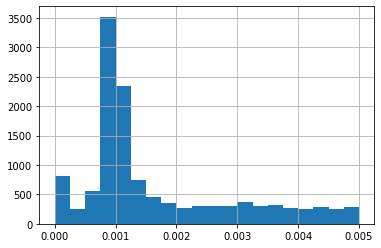

In [33]:
df['time'].diff().hist(bins=20, range=(0,0.005))

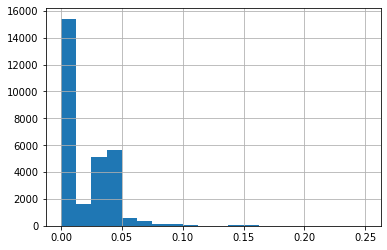

In [34]:
df['time'].diff().hist(bins=20, range=(0, 0.25))

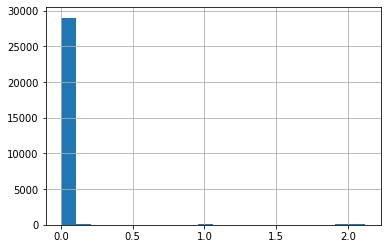

In [35]:
df['time'].diff().hist(bins=20)

In [36]:
np.var(df['time'].values)

151588.10477728935

In [37]:
sample_path = csv_paths[0]
sample_folder = "/".join(sample_path.split('/')[:-1])

In [38]:
files = listdir(sample_folder)

In [39]:
files

['echodot_nodup.pcap',
 't-echodot_nodup.csv',
 'echodot_nodup.txt',
 'echodot3b_nodup.txt',
 'echodot3b_nodup.pcap',
 'homepod_nodup.txt',
 't-echodot.pcap',
 'echodot.pcap',
 'google-home-mini2_nodup.csv',
 'echodot3a_nodup.csv',
 'homepod.pcap',
 'invoke.pcap',
 'echodot3b.pcap',
 'invoke_nodup.pcap',
 'invoke_nodup.csv',
 'echodot3b_nodup.csv',
 'echodot3a.pcap',
 'echodot_nodup.csv',
 't-echodot_nodup.txt',
 'homepod_nodup.pcap',
 'homepod_nodup.csv',
 't-echodot_nodup.pcap',
 'google-home-mini2_nodup.pcap',
 'google-home-mini2_nodup.txt',
 'echodot3a_nodup.txt',
 'invoke_nodup.txt',
 'echodot3a_nodup.pcap',
 'google-home-mini2.pcap']

In [40]:
def get_time(csv_path):
    temp = csv_path.split('/')
    
    temp[-1] = 'relative-time.txt'
    time_txt_path = '/'.join(temp)
    with open(time_txt_path, 'r') as f:
        for l in f:
            print(l)
    return None

In [41]:
csv_paths[0]

'/Users/kuangwenyi/Documents/Development/master-research/activations-final1a/[S12.Ep8] The Big Bang Theory - The Consummation Deviation/echodot_nodup.csv'

In [42]:
#get_time(csv_path=csv_paths[0])

In [43]:
t = 0
names = set()
for path in tsharks_res:
    if ".txt" in path:
        names.add(path.split('/')[-1])
        t += 1

In [44]:
print(names)

{'echodot3a_nodup.txt', 'homepod_nodup.txt', 'invoke_nodup.txt', 'google-home-mini2_nodup.txt', 'echodot_nodup.txt', 'echodot3b_nodup.txt', 't-echodot_nodup.txt'}


In [45]:
#[1a, 1b, 2a, 2b] -> belong to same device, for invoke
#invoke.txt

## start with invoke

### Since all the data we have are positive.
#### The target we could use to optimize is the ratio of detect of positive.

In [13]:
seprate_paths = defaultdict(list)

In [27]:
for path in csv_paths:
    seprate_paths[path.split('/')[-1].split('.')[0]].append(path)

In [48]:
seprate_paths.keys()

dict_keys(['echodot_nodup', 'echodot3b_nodup', 'homepod_nodup', 't-echodot_nodup', 'google-home-mini2_nodup', 'echodot3a_nodup', 'invoke_nodup'])

In [49]:
df_nodup = pd.read_csv(seprate_paths['invoke_nodup'][0])

In [50]:
df_nodup.columns

Index(['time', 'source', 'destination', 'protocol', 'length', 'Info'], dtype='object')

In [51]:
df_nodup['time'].describe()

count    1614.000000
mean      614.186493
std       372.560043
min         0.000000
25%       290.349585
50%       596.404108
75%       938.880651
max      1255.288823
Name: time, dtype: float64

In [52]:
df_nodup['protocol'].describe()

count        1614
unique          7
top       TLSv1.2
freq         1059
Name: protocol, dtype: object

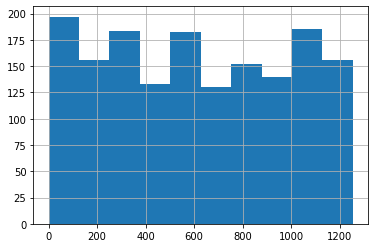

In [53]:
df_nodup['time'].hist()

In [54]:
np.var(df_nodup['time'].values)

138714.9878112716

In [55]:
def get_all_var(path):
    df = pd.read_csv(path)
    return np.var(df['time'].values)

In [56]:
var_invoke = []
for invoke_path in seprate_paths['invoke_nodup']:
    var_invoke.append(get_all_var(invoke_path))

(array([23.,  6.,  1., 48.,  4.,  4.,  4.,  1.,  1.,  1.]),
 array([ 101883.54670057,  221999.20091435,  342114.85512813,
         462230.50934191,  582346.16355569,  702461.81776947,
         822577.47198325,  942693.12619703, 1062808.78041081,
        1182924.43462459, 1303040.08883837]),
 <a list of 10 Patch objects>)

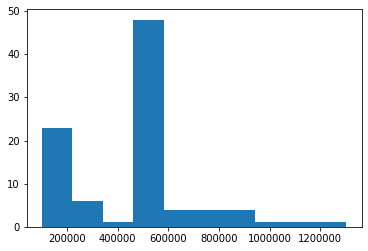

In [57]:
plt.hist(var_invoke)

In [58]:
vars_invoke = np.asarray(var_invoke)

In [59]:
((vars_invoke < 200000) | ((vars_invoke > 450000) & (vars_invoke < 600000))).sum()/len(vars_invoke)

0.7849462365591398

In [60]:
big_vars_idx = []
small_vars_idx = []
for idx, var in enumerate(var_invoke):
    if var < 600000 and var > 450000:
        big_vars_idx.append(idx)
    if var < 200000:
        small_vars_idx.append(idx)

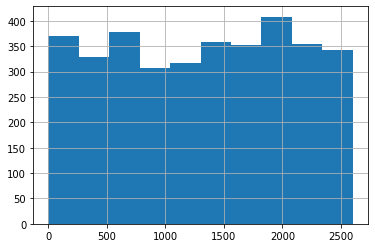

In [61]:
pd.read_csv(seprate_paths['invoke_nodup'][big_vars_idx[0]])['time'].hist()

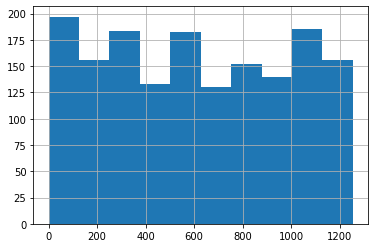

In [62]:
pd.read_csv(seprate_paths['invoke_nodup'][small_vars_idx[0]])['time'].hist()

#### From the above histgram, we could clear see there are two peaks, one is 100k ish variance of timing and the other is 500k ish.

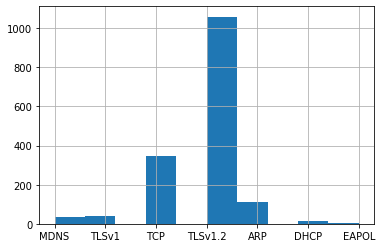

In [63]:
df_nodup['protocol'].hist()

In [64]:
protcols = list(df_nodup['protocol'].values)

In [65]:
k = 10
window = deque([], maxlen = k)

In [66]:
sliding_window = defaultdict(int)
for p in protcols:
    window.append(p)
    if len(window) == k:
        sliding_window[",".join(window)] += 1
    

In [67]:
sliding_window

defaultdict(int,
            {'MDNS,TLSv1,TLSv1,TCP,TLSv1.2,TCP,TLSv1.2,TCP,TCP,TCP': 1,
             'TLSv1,TLSv1,TCP,TLSv1.2,TCP,TLSv1.2,TCP,TCP,TCP,TCP': 1,
             'TLSv1,TCP,TLSv1.2,TCP,TLSv1.2,TCP,TCP,TCP,TCP,TLSv1.2': 1,
             'TCP,TLSv1.2,TCP,TLSv1.2,TCP,TCP,TCP,TCP,TLSv1.2,TLSv1.2': 1,
             'TLSv1.2,TCP,TLSv1.2,TCP,TCP,TCP,TCP,TLSv1.2,TLSv1.2,TCP': 1,
             'TCP,TLSv1.2,TCP,TCP,TCP,TCP,TLSv1.2,TLSv1.2,TCP,ARP': 1,
             'TLSv1.2,TCP,TCP,TCP,TCP,TLSv1.2,TLSv1.2,TCP,ARP,ARP': 1,
             'TCP,TCP,TCP,TCP,TLSv1.2,TLSv1.2,TCP,ARP,ARP,ARP': 1,
             'TCP,TCP,TCP,TLSv1.2,TLSv1.2,TCP,ARP,ARP,ARP,TLSv1.2': 1,
             'TCP,TCP,TLSv1.2,TLSv1.2,TCP,ARP,ARP,ARP,TLSv1.2,TCP': 1,
             'TCP,TLSv1.2,TLSv1.2,TCP,ARP,ARP,ARP,TLSv1.2,TCP,TCP': 1,
             'TLSv1.2,TLSv1.2,TCP,ARP,ARP,ARP,TLSv1.2,TCP,TCP,TLSv1.2': 1,
             'TLSv1.2,TCP,ARP,ARP,ARP,TLSv1.2,TCP,TCP,TLSv1.2,TCP': 1,
             'TCP,ARP,ARP,ARP,TLSv1.2,TCP,TCP,TLS

In [68]:
def looking_for_pattern(df, k):
    protcols = list(df['protocol'].values)
    window = deque([], maxlen = k)
    sliding_window = defaultdict(int)
    for p in protcols:
        window.append(p)
        if len(window) == k:
            sliding_window[",".join(window)] += 1
    return sliding_window

In [69]:
looking_for_pattern(df_nodup, 3)

defaultdict(int,
            {'MDNS,TLSv1,TLSv1': 4,
             'TLSv1,TLSv1,TCP': 21,
             'TLSv1,TCP,TLSv1.2': 17,
             'TCP,TLSv1.2,TCP': 61,
             'TLSv1.2,TCP,TLSv1.2': 221,
             'TLSv1.2,TCP,TCP': 10,
             'TCP,TCP,TCP': 8,
             'TCP,TCP,TLSv1.2': 9,
             'TCP,TLSv1.2,TLSv1.2': 186,
             'TLSv1.2,TLSv1.2,TCP': 235,
             'TLSv1.2,TCP,ARP': 31,
             'TCP,ARP,ARP': 34,
             'ARP,ARP,ARP': 38,
             'ARP,ARP,TLSv1.2': 32,
             'ARP,TLSv1.2,TCP': 3,
             'TLSv1.2,TLSv1.2,TLSv1.2': 508,
             'TLSv1.2,TCP,MDNS': 26,
             'TCP,MDNS,TLSv1.2': 22,
             'MDNS,TLSv1.2,TLSv1.2': 19,
             'ARP,TLSv1.2,TLSv1.2': 29,
             'TLSv1.2,TCP,TLSv1': 14,
             'TCP,TLSv1,TLSv1': 14,
             'TLSv1,TCP,MDNS': 2,
             'MDNS,TLSv1.2,TCP': 7,
             'TLSv1.2,TLSv1.2,ARP': 1,
             'TLSv1.2,ARP,ARP': 1,
             'ARP,ARP,T

In [70]:
def plot_time_line_vs_protocal(df):
    x = df['time']
    y = df['protocol']
    plt.scatter(x, y, alpha=0.85, s=10)

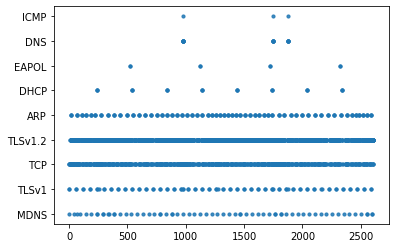

In [71]:
plot_time_line_vs_protocal(pd.read_csv(seprate_paths['invoke_nodup'][big_vars_idx[25]]))

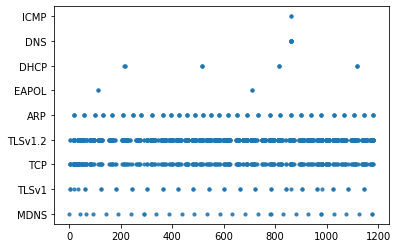

In [72]:
plot_time_line_vs_protocal(pd.read_csv(seprate_paths['invoke_nodup'][small_vars_idx[14]]))

In [73]:
df_nodup.columns

Index(['time', 'source', 'destination', 'protocol', 'length', 'Info'], dtype='object')

In [74]:
df_nodup['destination'].describe()

count             1614
unique              11
top       52.114.88.22
freq               742
Name: destination, dtype: object

In [75]:
def plot_timeline_vs_destinations(df):
    x = df['time']
    y = df['destination']
    plt.scatter(x, y, alpha=0.85, s=10)

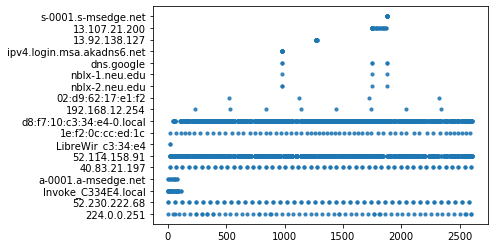

In [76]:
plot_timeline_vs_destinations(pd.read_csv(seprate_paths['invoke_nodup'][big_vars_idx[25]]))

In [77]:
def plot_timeline_vs_dest_prot(df):
    x = df['time']
    y = df['destination']
    cdict = {'ARP' : 0, 'DHCP': 1 , 'EAPOL': 2, 'MDNS': 3, 'TCP': 4, 'TLSv1':5, 'TLSv1.2':6, 'DNS':7, 'ICMP':8}
    c = list(df['protocol'].values)
    color = []
    for _c in c:
        color.append(cdict.get(_c, None))
    plt.scatter(x, y, c = color, alpha = 0.7, s=10)
    plt.xlabel('time in sec')
    plt.ylabel('desitinations')


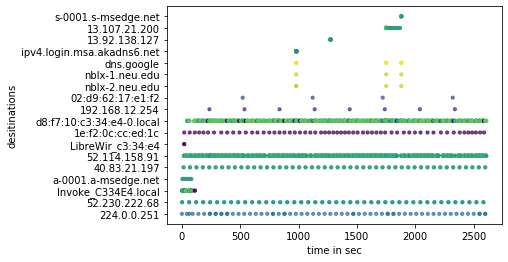

In [78]:
plot_timeline_vs_dest_prot(pd.read_csv(seprate_paths['invoke_nodup'][big_vars_idx[25]]))

In [79]:
set(pd.read_csv(seprate_paths['invoke_nodup'][big_vars_idx[25]])['protocol'].values)

{'ARP', 'DHCP', 'DNS', 'EAPOL', 'ICMP', 'MDNS', 'TCP', 'TLSv1', 'TLSv1.2'}

In [80]:
pd.read_csv(seprate_paths['invoke_nodup'][0])

,time,source,destination,protocol,length,Info
0,0.000000,Invoke_C334E4.local,224.0.0.251,MDNS,327,Standard query response 0x0000 PTR cache flush...
1,3.472371,Invoke_C334E4.local,52.230.222.68,TLSv1,144,Application Data Application Data
2,3.508624,52.230.222.68,Invoke_C334E4.local,TLSv1,224,Application Data Application Data
3,3.511412,Invoke_C334E4.local,52.230.222.68,TCP,54,32879 https(443) [ACK] Seq=91 Ack=171 Win=594 ...
4,5.785139,Invoke_C334E4.local,13.107.21.200,TLSv1.2,89,Application Data
...,...,...,...,...,...,...
1609,1255.077030,d8:f7:10:c3:34:e4-0.local,52.114.88.22,TLSv1.2,490,Application Data
1610,1255.162522,52.114.88.22,d8:f7:10:c3:34:e4-0.local,TLSv1.2,120,Application Data
1611,1255.163873,d8:f7:10:c3:34:e4-0.local,52.114.88.22,TLSv1.2,853,Application Data
1612,1255.249908,52.114.88.22,d8:f7:10:c3:34:e4-0.local,TLSv1.2,492,Application Data


In [81]:
with open(seprate_paths['invoke_nodup'][0]) as f:
    for l in f:
        print(l)

time,source,destination,protocol,length,Info

0.000000,Invoke_C334E4.local,224.0.0.251,MDNS,327,Standard query response 0x0000 PTR cache flush Invoke_C334E4.local TXT cache flush PTR _http._tcp.local PTR Invoke_C334E4._http._tcp.local A cache flush 192.168.12.116 SRV cache flush 0 0 80 Invoke_C334E4.local NSEC cache flush 116.12.168.192.in-addr.arpa NSEC cache flush Invoke_C334E4._http._tcp.local NSEC cache flush Invoke_C334E4.local

3.472371,Invoke_C334E4.local,52.230.222.68,TLSv1,144,Application Data Application Data

3.508624,52.230.222.68,Invoke_C334E4.local,TLSv1,224,Application Data Application Data

3.511412,Invoke_C334E4.local,52.230.222.68,TCP,54,32879 https(443) [ACK] Seq=91 Ack=171 Win=594 Len=0

5.785139,Invoke_C334E4.local,13.107.21.200,TLSv1.2,89,Application Data

5.796420,13.107.21.200,Invoke_C334E4.local,TCP,54,https(443) 35942 [ACK] Seq=1 Ack=36 Win=1024 Len=0

5.796510,13.107.21.200,Invoke_C334E4.local,TLSv1.2,85,Application Data

5.796542,13.107.21.200,Invoke_C334E4.

In [82]:
cache = []
with open('/Users/kuangwenyi/Documents/Development/activations-final1a/[S12.Ep8] The Big Bang Theory - The Consummation Deviation/invoke_nodup.txt') as f:
    for l in f:
        cache.append(l)
        break

In [83]:
cache[0].split('  ')

['1',
 ' 0.000000 HK Invoke_C334E4.local → 224.0.0.251',
 'MDNS 327 Standard query response 0x0000 PTR, cache flush HK Invoke_C334E4.local TXT, cache flush PTR _http._tcp.local PTR HK Invoke_C334E4._http._tcp.local A, cache flush 192.168.12.116 SRV, cache flush 0 0 80 HK Invoke_C334E4.local NSEC, cache flush 116.12.168.192.in-addr.arpa NSEC, cache flush HK Invoke_C334E4._http._tcp.local NSEC, cache flush HK Invoke_C334E4.local\n']

In [84]:
seprate_paths['invoke_nodup'][0]

'/Users/kuangwenyi/Documents/Development/master-research/activations-final1a/[S12.Ep8] The Big Bang Theory - The Consummation Deviation/invoke_nodup.csv'

In [85]:
class activate_detector_baseline:
    def __init__(self):
        self.variance = []
        self.standard_div = None
        
    def fit(self, paths):
        for path in paths:
            df = pd.read_csv(path)
            path_var = np.var(df['time'].values)
            self.variance.append(path_var)
    
    def predict(self, path):
        df = pd.read_csv(path)
        path_var = np.var(df['time'].values)
        
        self.variance.sort()
        self.standard_div = math.sqrt(np.var(self.variance))
        
        inserting_idx = bisect.bisect_left(a=self.variance, x=path_var)
        
        left = inserting_idx - 1
        right = inserting_idx + 1
        cnt = 0
        while left >= 0 and self.variance[left] > max(0, path_var - (1.5 * self.standard_div)):
            left -= 1
            cnt += 1
            
        while right < len(self.variance) and self.variance[right] < path_var + 1.5 * self.standard_div:
            right += 1
            cnt += 1
        
        return cnt/len(self.variance) > 0.5
        

In [86]:
baseline_model = activate_detector_baseline()

In [87]:
%%time
baseline_model.fit(seprate_paths['invoke_nodup'])

CPU times: user 503 ms, sys: 103 ms, total: 606 ms
Wall time: 606 ms


In [88]:
%%time
cnt = 0
for idx in range(len(seprate_paths['invoke_nodup'])):
    if baseline_model.predict(seprate_paths['invoke_nodup'][idx]):
        cnt += 1

CPU times: user 516 ms, sys: 117 ms, total: 634 ms
Wall time: 634 ms


In [89]:
cnt/len(seprate_paths['invoke_nodup'])

0.7204301075268817

## Deal with speed
Since we need to care about the speed of pocket, AKA how many packet sent per second, we need to do some conversion in the dataframe.

In [90]:
#MD5_pattern = r'(^([0-9A-Fa-f]{2}[:-]){5}([0-9A-Fa-f]{2})$)'
IP_pattern = r'^(((25[0-5]|2[0-4][0-9]|[01]?[0-9][0-9]?)\.){3}(25[0-5]|2[0-4][0-9]|[01]?[0-9][0-9]?)$)|(^([0-9A-Fa-f]{2}[:-]){5}([0-9A-Fa-f]{2})$)'

In [91]:
df = pd.read_csv(seprate_paths['invoke_nodup'][12])
#df[df.destination.str.match(IP_pattern) != True & df.source.str.match(IP_pattern) != True]

In [92]:
df.destination.str.match(IP_pattern)

0        True
1        True
2       False
3        True
4       False
        ...  
2172     True
2173    False
2174     True
2175    False
2176     True
Name: destination, Length: 2177, dtype: bool

In [93]:
df[~(df.source.str.match(IP_pattern) | df.destination.str.match(IP_pattern))]

,time,source,destination,protocol,length,Info
4,5.310034,Invoke_C334E4.local,a-0001.a-msedge.net,TLSv1.2,89,Application Data
5,5.321584,a-0001.a-msedge.net,Invoke_C334E4.local,TCP,54,https(443) 36498 [ACK] Seq=1 Ack=36 Win=1024 L...
6,5.321702,a-0001.a-msedge.net,Invoke_C334E4.local,TLSv1.2,85,Application Data
7,5.321743,a-0001.a-msedge.net,Invoke_C334E4.local,TCP,60,https(443) 36498 [ACK] Seq=1 Ack=36 Win=1024 L...
8,5.322838,Invoke_C334E4.local,a-0001.a-msedge.net,TCP,54,36498 https(443) [ACK] Seq=36 Ack=32 Win=660 L...
...,...,...,...,...,...,...
1873,2207.348330,nblx-2.neu.edu,d8:f7:10:c3:34:e4-0.local,DNS,127,Standard query response 0xb7af A websockets.pl...
1874,2207.351625,dns.google,d8:f7:10:c3:34:e4-0.local,DNS,127,Standard query response 0xb7af A websockets.pl...
1875,2207.352589,d8:f7:10:c3:34:e4-0.local,dns.google,ICMP,155,Destination unreachable (Port unreachable)
1876,2207.372249,nblx-1.neu.edu,d8:f7:10:c3:34:e4-0.local,DNS,127,Standard query response 0xb7af A websockets.pl...


In [94]:
def filter_out(path):
    IP_pattern = r'^(((25[0-5]|2[0-4][0-9]|[01]?[0-9][0-9]?)\.){3}(25[0-5]|2[0-4][0-9]|[01]?[0-9][0-9]?)$)|(^([0-9A-Fa-f]{2}[:-]){5}([0-9A-Fa-f]{2})$)'
    df = pd.read_csv(path)
    df = df[~(df.source.str.match(IP_pattern) | df.destination.str.match(IP_pattern))].reset_index(drop=True)
    return df

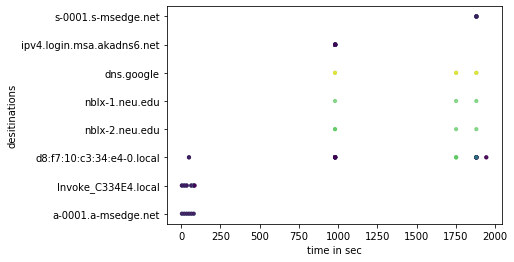

In [95]:
plot_timeline_vs_dest_prot(filter_out(seprate_paths['invoke_nodup'][big_vars_idx[25]]))

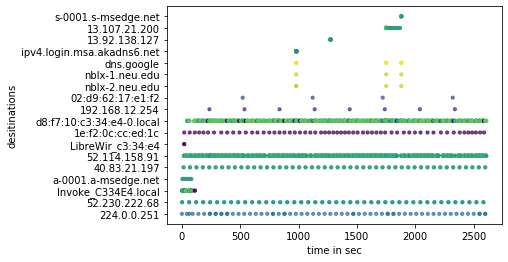

In [96]:
plot_timeline_vs_dest_prot(pd.read_csv(seprate_paths['invoke_nodup'][big_vars_idx[25]]))

In [97]:
filter_out(seprate_paths['invoke_nodup'][big_vars_idx[25]]).destination.value_counts().to_dict()

{'d8:f7:10:c3:34:e4-0.local': 45,
 'ipv4.login.msa.akadns6.net': 30,
 'Invoke_C334E4.local': 17,
 'a-0001.a-msedge.net': 12,
 's-0001.s-msedge.net': 10,
 'dns.google': 6,
 'nblx-2.neu.edu': 4,
 'nblx-1.neu.edu': 3}

In [98]:
destination = defaultdict(int)
start = defaultdict(int)
for path in seprate_paths['invoke_nodup']:
    df = filter_out(path)
    
    for key, value in df.destination.value_counts().to_dict().items():
        destination[key] += value
    
    for key, value in df.source.value_counts().to_dict().items():
        start[key] += value

In [99]:
destination

defaultdict(int,
            {'d8:f7:10:c3:34:e4-0.local': 7216,
             'a-0001.a-msedge.net': 1401,
             'Invoke_C334E4.local': 533,
             'nblx-1.neu.edu': 319,
             'dns.google': 320,
             'nblx-2.neu.edu': 338,
             'dual-a-0001.a-msedge.net': 899,
             'ipv4.login.msa.akadns6.net': 767,
             'lgin.msa.trafficmanager.net': 457,
             'trouter-cus-b.cloudapp.net': 181,
             'rps-usea-b.cloudapp.net': 376,
             'pipe.cloudapp.aria.akadns.net': 1749,
             'dm3p.wns.notify.windows.com.akadns.net': 74,
             's-0001.s-msedge.net': 301,
             'sconsentit911p.cloudapp.net': 165,
             'any.edge.bing.com': 269,
             'c-cc-usea2-01-skype.cloudapp.net': 18,
             'Broadcast': 18,
             'fe-by01p-msa.trafficmanager.net': 45,
             'root.skype-edf.akadns.net': 68})

In [100]:
start

defaultdict(int,
            {'a-0001.a-msedge.net': 2145,
             'd8:f7:10:c3:34:e4-0.local': 7432,
             'Invoke_C334E4.local': 333,
             'nblx-2.neu.edu': 250,
             'nblx-1.neu.edu': 212,
             'dns.google': 221,
             'dual-a-0001.a-msedge.net': 1377,
             'lgin.msa.trafficmanager.net': 291,
             'ipv4.login.msa.akadns6.net': 452,
             'trouter-cus-b.cloudapp.net': 103,
             'rps-usea-b.cloudapp.net': 265,
             'pipe.cloudapp.aria.akadns.net': 1290,
             'dm3p.wns.notify.windows.com.akadns.net': 50,
             's-0001.s-msedge.net': 415,
             'sconsentit911p.cloudapp.net': 160,
             'any.edge.bing.com': 437,
             'c-cc-usea2-01-skype.cloudapp.net': 16,
             'fe-by01p-msa.trafficmanager.net': 27,
             'root.skype-edf.akadns.net': 38})

In [101]:
df.time #second as unit

0         7.545973
1         7.557311
2         7.557400
3         7.557436
4         7.560283
          ...     
285    3670.676851
286    3675.967258
287    3675.967354
288    3687.874168
289    3687.874263
Name: time, Length: 290, dtype: float64

In [102]:
def get_speed(df, delta=1):
    second_count = defaultdict(int)
    start = 0
    for val in df.time:
        if round(val, 1) > start and round(val, 1) < start + delta:
            second_count[start] += 1
        else:
            start = round(val,1)
            second_count[start] = 1
    return second_count

In [103]:
np.var(list(get_speed(df).values()))

198.06770833333334

In [104]:
var_speeds = []
max_speeds = []
for path in seprate_paths['invoke_nodup']:
    df = filter_out(path)
    Var_speed = np.var(list(get_speed(df).values()))
    max_speed = max(list(get_speed(df).values()))
    max_speeds.append(max_speed)
    var_speeds.append(Var_speed)
    #print(get_speed(df).values(), Var_speed, path)

/Users/kuangwenyi/miniconda3/envs/master_research/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3584: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/Users/kuangwenyi/miniconda3/envs/master_research/lib/python3.7/site-packages/numpy/core/_methods.py:186: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/Users/kuangwenyi/miniconda3/envs/master_research/lib/python3.7/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


ValueError: max() arg is an empty sequence

In [112]:
sorted(var_speeds)

[]

In [ ]:
max_speeds

In [ ]:
#filter_out('/home/wenyi/Documents/Development/activation_detector/activations-final1a/[S3.Ep8] Greenleaf - Dea Abscondita/invoke_nodup.csv').destination.value_counts()

In [ ]:
#plot_timeline_vs_dest_prot(filter_out('/home/wenyi/Documents/Development/activation_detector/activations-final1a/[S3.Ep8] Greenleaf - Dea Abscondita/invoke_nodup.csv'))

In [105]:
plateau_path = '/Users/kuangwenyi/Documents/Development/activations-final1a/[S3.Ep8] Greenleaf - Dea Abscondita/invoke_nodup.csv'

In [106]:
plateau_df = filter_out(plateau_path)

In [107]:
plateau_df.protocol

0           DNS
1           DNS
2           DNS
3           DNS
4           DNS
         ...   
1910    TLSv1.2
1911    TLSv1.2
1912    TLSv1.2
1913    TLSv1.2
1914        TCP
Name: protocol, Length: 1915, dtype: object

In [113]:
plateau_df.destination.value_counts()

dual-a-0001.a-msedge.net       34
ipv4.login.msa.akadns6.net     28
s-0001.s-msedge.net            26
rps-usea-b.cloudapp.net        14
nblx-1.neu.edu                 13
sconsentit911p.cloudapp.net    11
dns.google                      8
nblx-2.neu.edu                  8
Name: destination, dtype: int64

In [114]:
df.destination.value_counts()

Series([], Name: destination, dtype: int64)

In [115]:
def remove_background_noise(df, thereshold = 500):
    counts = df['destination'].value_counts()
    return df[df['destination'].isin(counts[counts < thereshold].index)]

In [116]:
plateau_df = remove_background_noise(plateau_df)

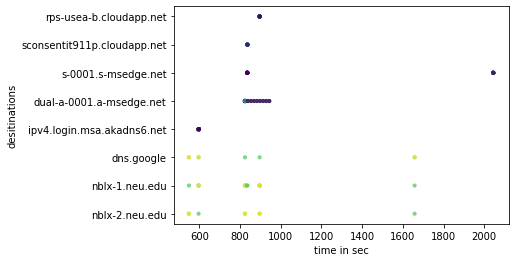

In [117]:
plot_timeline_vs_dest_prot(plateau_df)

In [118]:
var_speeds = []
max_speeds = []
for path in seprate_paths['invoke_nodup']:
    df = filter_out(path)
    df = remove_background_noise(df)
    Var_speed = np.var(list(get_speed(df).values()))
    max_speed = max(list(get_speed(df).values()))
    max_speeds.append(max_speed)
    var_speeds.append(Var_speed)
    #print(get_speed(df).values(), Var_speed, path)

ValueError: max() arg is an empty sequence

In [119]:
max_speeds

[]

In [120]:
var_speeds

[]

In [121]:
remove_background_noise(filter_out(seprate_paths['invoke_nodup'][0]))

,time,source,destination,protocol,length,Info


In [122]:
pd.read_csv(seprate_paths['invoke_nodup'][0])

,time,source,destination,protocol,length,Info
0,0.000000,Invoke_C334E4.local,224.0.0.251,MDNS,327,Standard query response 0x0000 PTR cache flush...
1,3.472371,Invoke_C334E4.local,52.230.222.68,TLSv1,144,Application Data Application Data
2,3.508624,52.230.222.68,Invoke_C334E4.local,TLSv1,224,Application Data Application Data
3,3.511412,Invoke_C334E4.local,52.230.222.68,TCP,54,32879 https(443) [ACK] Seq=91 Ack=171 Win=594 ...
4,5.785139,Invoke_C334E4.local,13.107.21.200,TLSv1.2,89,Application Data
...,...,...,...,...,...,...
1609,1255.077030,d8:f7:10:c3:34:e4-0.local,52.114.88.22,TLSv1.2,490,Application Data
1610,1255.162522,52.114.88.22,d8:f7:10:c3:34:e4-0.local,TLSv1.2,120,Application Data
1611,1255.163873,d8:f7:10:c3:34:e4-0.local,52.114.88.22,TLSv1.2,853,Application Data
1612,1255.249908,52.114.88.22,d8:f7:10:c3:34:e4-0.local,TLSv1.2,492,Application Data


In [123]:
filter_out(seprate_paths['invoke_nodup'][0])['destination'].value_counts()

Series([], Name: destination, dtype: int64)

In [124]:
#1. computer speed by sliding window
#2. convert the address by WHOIS and clustering together 

In [125]:
raw_df = pd.read_csv(seprate_paths['invoke_nodup'][1])

In [126]:
def calculatingspeedslidingwindow(timestamps, window_size=5):
    """
    timestamps, list of timestamps
    """
    res = []
    queue = deque([], maxlen = window_size)

    for timestamp in timestamps:
        queue.append(timestamp)
        if len(queue) == window_size:
            speed = (queue[-1] - queue[0])/len(queue)
            res.append(speed)
    
    for _ in range(1, window_size):
        res.append((queue[-1] - queue[0])/len(queue))
    return res

In [127]:
raw_speed = calculatingspeedslidingwindow(raw_df.time)

In [128]:
len(raw_df.time)

2253

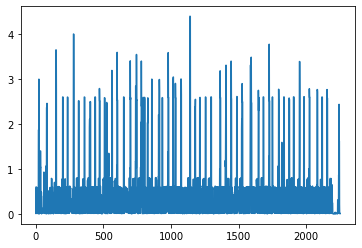

In [129]:
plt.plot(raw_speed)

In [130]:
filter_speed_plateau = calculatingspeedslidingwindow(plateau_df.time)

Text(0, 0.5, 'packet/sec')

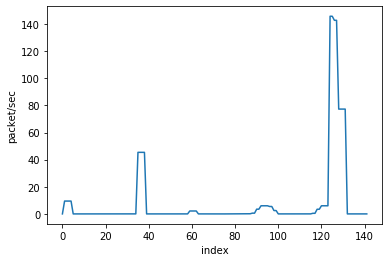

In [131]:
plt.plot(filter_speed_plateau)
plt.xlabel('index')
plt.ylabel('packet/sec')

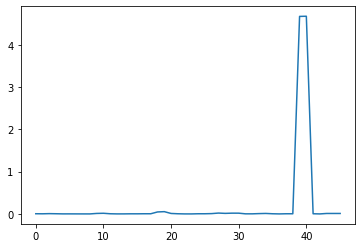

In [132]:
plt.plot(calculatingspeedslidingwindow(filter_out(seprate_paths['invoke_nodup'][1]).time, 3))

In [133]:
np.var(calculatingspeedslidingwindow(filter_out(seprate_paths['invoke_nodup'][1]).time, 3))

0.904143828381069

In [134]:
np.var(calculatingspeedslidingwindow(filter_out(seprate_paths['invoke_nodup'][5]).time, 3))

113.97667141828963

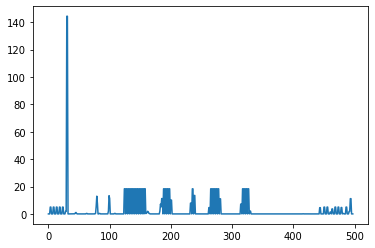

In [135]:
plt.plot(calculatingspeedslidingwindow(filter_out(seprate_paths['invoke_nodup'][5]).time, 3))

In [136]:
def speed_over_time(df, window_size = 5):
    speed = calculatingspeedslidingwindow(df.time, window_size = window_size)
    time = df.time
    plt.plot(time, speed)
    plt.xlabel("time in sec")
    plt.ylabel("speed: packet per second")
    plt.title("time vs speed for window_size is {}".format(window_size))

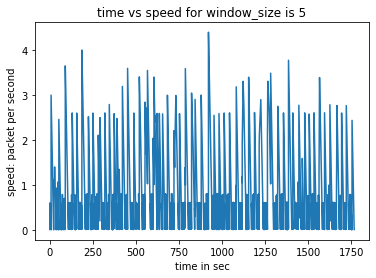

In [137]:
speed_over_time(raw_df)

In [138]:
df_path = seprate_paths['invoke_nodup'][5]
df = pd.read_csv(df_path)

In [139]:
df.destination

0                   52.242.211.89
1                  192.168.12.116
2                   52.242.211.89
3                     224.0.0.251
4             a-0001.a-msedge.net
                  ...            
3559                52.114.158.91
3560    d8:f7:10:c3:34:e4-0.local
3561                52.114.158.91
3562    d8:f7:10:c3:34:e4-0.local
3563                52.114.158.91
Name: destination, Length: 3564, dtype: object

In [140]:
filter_out(df_path)

,time,source,destination,protocol,length,Info
0,3.034264,Invoke_C334E4.local,a-0001.a-msedge.net,TLSv1.2,89,Application Data
1,3.045870,a-0001.a-msedge.net,Invoke_C334E4.local,TCP,54,https(443) 37651 [ACK] Seq=1 Ack=36 Win=1024 L...
2,3.045976,a-0001.a-msedge.net,Invoke_C334E4.local,TLSv1.2,85,Application Data
3,3.045973,a-0001.a-msedge.net,Invoke_C334E4.local,TCP,60,https(443) 37651 [ACK] Seq=1 Ack=36 Win=1024 L...
4,3.047009,Invoke_C334E4.local,a-0001.a-msedge.net,TCP,54,37651 https(443) [ACK] Seq=36 Ack=32 Win=660 L...
...,...,...,...,...,...,...
493,2394.705472,dual-a-0001.a-msedge.net,d8:f7:10:c3:34:e4-0.local,TCP,54,https(443) 58890 [RST ACK] Seq=7615 Ack=21135 ...
494,2394.705605,dual-a-0001.a-msedge.net,d8:f7:10:c3:34:e4-0.local,TCP,60,https(443) 58890 [RST ACK] Seq=7615 Ack=21135 ...
495,2428.125676,d8:f7:10:c3:34:e4-0.local,trouter-cus-b.cloudapp.net,TLSv1.2,123,Application Data
496,2428.161153,trouter-cus-b.cloudapp.net,d8:f7:10:c3:34:e4-0.local,TLSv1.2,112,Application Data


In [141]:
whois.query('dual-a-0001.a-msedge.net').registrar

'MarkMonitor Inc.'

In [142]:
whois.query('trouter-cus-b.cloudapp.net').__dict__

{'name': 'cloudapp.net',
 'registrar': 'MarkMonitor Inc.',
 'creation_date': datetime.datetime(2008, 8, 7, 17, 34, 15),
 'expiration_date': datetime.datetime(2020, 8, 7, 17, 34, 15),
 'last_updated': None,
 'status': 'clientDeleteProhibited https://icann.org/epp#clientDeleteProhibited',
 'name_servers': {'ns1-201.azure-dns.com\r',
  'ns2-201.azure-dns.net\r',
  'ns3-201.azure-dns.org\r',
  'ns4-201.azure-dns.info\r'}}

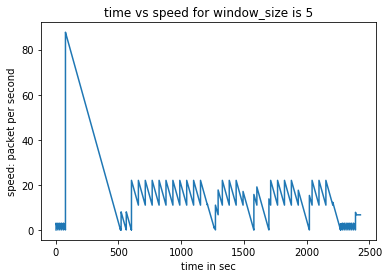

In [143]:
speed_over_time(filter_out(df_path))

In [144]:
def speed_slide_window_with_packet_size(df, window_size=5):
    """
    timestamps, list of timestamps
    """
    timestamps = df.time
    data_volume = df.length
    #am I implement the slide window right?
    res = []
    data_queue = deque([], maxlen = window_size)
    time_queue = deque([], maxlen = window_size)
    
    for timestamp, length in zip(timestamps, data_volume):
        data_queue.append(length)
        time_queue.append(timestamp)
        
        if len(data_queue) == window_size:
            #speed = [data trans] / [time used]
            
            ## 
            speed = sum(data_queue) / (time_queue[-1] - time_queue[0])
            ##
            
            res.append(speed)
    for _ in range(1, window_size):
        res.append(speed)
    return res

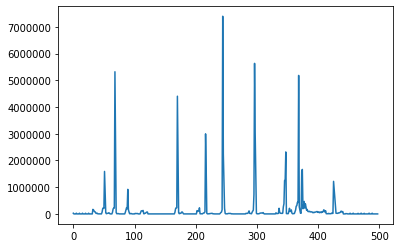

In [145]:
plt.plot(speed_slide_window_with_packet_size(filter_out(df_path)))

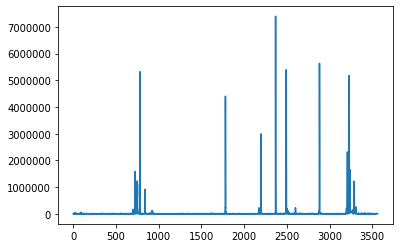

In [146]:
plt.plot(speed_slide_window_with_packet_size(pd.read_csv(df_path)))

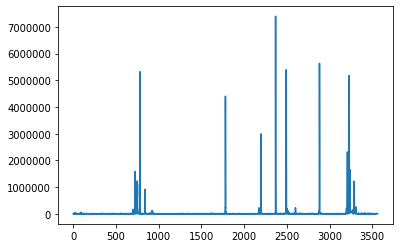

In [147]:
plt.plot(speed_slide_window_with_packet_size(pd.read_csv(seprate_paths['invoke_nodup'][5])))

In [148]:
def speed_with_data_over_time(df, window_size = 5):
    speed = speed_slide_window_with_packet_size(df, window_size = window_size)
    time = df.time
    plt.plot(time, speed)
    plt.xlabel("time in sec")
    plt.ylabel("speed: data trans per second (byte/sec)")
    plt.title("time vs speed for window_size is {}".format(window_size))

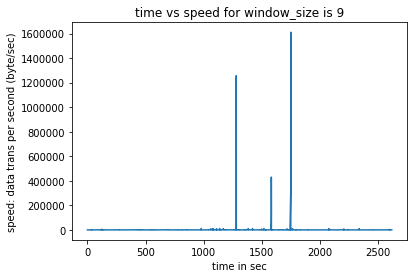

In [149]:
speed_with_data_over_time(df = pd.read_csv(seprate_paths['invoke_nodup'][12]), window_size = 9)

In [150]:
speed_slide_window_with_packet_size(pd.read_csv(seprate_paths['invoke_nodup'][12]))

[157.81443207331628,
 208.6308939150677,
 189.4115216108814,
 128.0734827224378,
 26710.402999062713,
 38.12293640545237,
 43.758928416774616,
 41.829138603332154,
 26.38688463613956,
 78.10159751851164,
 62.93130489335009,
 58.47533484951986,
 10480.189884973954,
 12056.996711727628,
 13137.465663440098,
 27430.221366702335,
 65.0252899661953,
 66.29546852469075,
 55.44079660167579,
 55.45115313819114,
 61.72199102010691,
 63.03577674303769,
 91.15664965541391,
 98.55369932121138,
 421.8036515992437,
 527.4630514872848,
 10153.021613363526,
 832.8301011227838,
 794.9360535093892,
 417.2441818059241,
 192.10325387096262,
 21017.699115043306,
 771.7588206943491,
 777.0343604786274,
 1515.8696198621083,
 1802.7236179193671,
 10184.365187988255,
 246.40985529108977,
 125.9029467527329,
 68.7321667404901,
 39.52404951705875,
 80.6528077016424,
 27327.207351161982,
 58.55383151462483,
 59.74485177024391,
 51.194173547454675,
 27.7345967766722,
 69.83858420821394,
 71.41359949345406,
 91.604

In [151]:
def find_peak(df, window_size = 5):
    speeds = speed_slide_window_with_packet_size(df, window_size)
    #calculate the slope(speed_[k - 1], speed_[k]) and slope(speed_[k], speed_[k + 1])
    #if slope(speed_[k-1]) is greater than others
    slopes = []
    for idx, speed in enumerate(speeds):
        if idx == 0 or idx == len(speeds) - 1 :
            continue
        slope = (speeds[idx] - speeds[idx - 1])
        slopes.append((idx, slope))
    slopes.sort(key=lambda x : -x[1])
    return slopes
        

In [152]:
find_peak(filter_out(seprate_paths['invoke_nodup'][12]))

[(58, 1880023.334994543),
 (48, 1344282.9135671747),
 (32, 130568.8496055931),
 (89, 74126.58118044774),
 (47, 67896.7593259457),
 (79, 55654.07747865448),
 (54, 49687.518772540505),
 (56, 40082.24110348779),
 (55, 36422.75048899444),
 (33, 35324.7215696153),
 (44, 33349.23922902816),
 (46, 28496.8596396281),
 (5, 27407.4168879027),
 (15, 27304.401506784263),
 (20, 27089.921497357926),
 (25, 25248.76522034427),
 (57, 21592.423775722506),
 (73, 21185.385417450052),
 (10, 20994.905764623403),
 (71, 16327.088127831288),
 (45, 8796.27184131727),
 (70, 6850.610890469512),
 (68, 6097.816182011637),
 (78, 4736.919025111201),
 (35, 3745.8621406702005),
 (74, 2895.812697066569),
 (43, 2849.6171138859254),
 (92, 2383.309977856392),
 (81, 2210.8875262984648),
 (72, 2137.1334401051136),
 (84, 1528.775760005558),
 (67, 1249.913124280717),
 (69, 1210.3413187820624),
 (40, 952.8275233331656),
 (64, 571.1428894330293),
 (90, 139.77787315638852),
 (66, 92.11177205083823),
 (83, 26.421289666860957),
 (2

In [153]:
pd.read_csv(seprate_paths['invoke_nodup'][12]).iloc[40 : 60, :]

,time,source,destination,protocol,length,Info
40,36.486720,Invoke_C334E4.local,13.88.28.53,TCP,66,50368 https(443) [ACK] Seq=2432 Ack=961 Win=54...
41,43.618632,d8:f7:10:c3:34:e4-0.local,224.0.0.251,MDNS,253,Standard query response 0x0000 PTR d8:f7:10:c3...
42,50.314911,d8:f7:10:c3:34:e4-0.local,a-0001.a-msedge.net,TLSv1.2,89,Application Data
43,50.326293,a-0001.a-msedge.net,d8:f7:10:c3:34:e4-0.local,TCP,54,https(443) 36498 [ACK] Seq=94 Ack=141 Win=1024...
44,50.326395,a-0001.a-msedge.net,d8:f7:10:c3:34:e4-0.local,TLSv1.2,85,Application Data
45,50.326396,a-0001.a-msedge.net,d8:f7:10:c3:34:e4-0.local,TCP,60,https(443) 36498 [ACK] Seq=94 Ack=141 Win=1024...
46,50.327426,d8:f7:10:c3:34:e4-0.local,a-0001.a-msedge.net,TCP,54,36498 https(443) [ACK] Seq=141 Ack=125 Win=660...
47,55.364392,1e:f2:0c:cc:ed:1c,Invoke_C334E4.local,ARP,42,Who has 192.168.12.116? Tell 192.168.12.254
48,55.364486,1e:f2:0c:cc:ed:1c,Invoke_C334E4.local,ARP,60,Who has 192.168.12.116? Tell 192.168.12.254
49,55.366032,d8:f7:10:c3:34:e4-0.local,1e:f2:0c:cc:ed:1c,ARP,42,192.168.12.116 is at d8:f7:10:c3:34:e4


In [154]:
whois.query("a-0001.a-msedge.net").__dict__

{'name': 'a-msedge.net',
 'registrar': 'MarkMonitor Inc.',
 'creation_date': datetime.datetime(2014, 3, 6, 22, 15, 17),
 'expiration_date': datetime.datetime(2021, 3, 6, 22, 15, 17),
 'last_updated': None,
 'status': 'clientDeleteProhibited https://icann.org/epp#clientDeleteProhibited',
 'name_servers': {'ns1.a-msedge.net',
  'ns1.a-msedge.net\r',
  'ns2.a-msedge.net',
  'ns2.a-msedge.net\r'}}

In [155]:
whois.query("52.242.211.89")

UnknownTld: Unknown TLD: 89
(all known TLD: ['com', 'uk', 'ac_uk', 'ar', 'at', 'pl', 'be', 'biz', 'br', 'ca', 'cc', 'cl', 'club', 'cn', 'co', 'jp', 'co_jp', 'cz', 'de', 'edu', 'education', 'eu', 'fr', 'id', 'info', 'io', 'it', 'kr', 'kz', 'lt', 'ru', 'lv', 'me', 'mobi', 'mx', 'name', 'net', 'ninja', 'nyc', 'nz', 'online', 'org', 'pharmacy', 'press', 'pw', 'store', 'rest', 'ru_rf', 'security', 'sh', 'site', 'space', 'tech', 'tel', 'theatre', 'tickets', 'tv', 'us', 'uz', 'video', 'website', 'wiki', 'xyz'])

In [ ]:
# pcap -> model -> time of activations.
#make sure script recognization destination is M$ or not.
#get a unkown pcap file and test the script. 

In [156]:
#algo design:
#1. find out the peak, by using outlier dectetship z-test
#2. for the outliers find out the major of owner of destinations, if they are pointing to the same owner
#vote to peak.

In [157]:
data = speed_slide_window_with_packet_size(df =  pd.read_csv(seprate_paths['invoke_nodup'][12]), window_size = 9)

In [158]:
def is_outlier(points, thresh=3.5):
    """
    Returns a boolean array with True if points are outliers and False 
    otherwise.

    Parameters:
    -----------
        points : An numobservations by numdimensions array of observations
        thresh : The modified z-score to use as a threshold. Observations with
            a modified z-score (based on the median absolute deviation) greater
            than this value will be classified as outliers.

    Returns:
    --------
        mask : A numobservations-length boolean array.

    References:
    ----------
        Boris Iglewicz and David Hoaglin (1993), "Volume 16: How to Detect and
        Handle Outliers", The ASQC Basic References in Quality Control:
        Statistical Techniques, Edward F. Mykytka, Ph.D., Editor. 
    """
    if len(points.shape) == 1:
        points = points[:,None]
    median = np.median(points, axis=0)
    diff = np.sum((points - median)**2, axis=-1)
    diff = np.sqrt(diff)
    med_abs_deviation = np.median(diff)

    modified_z_score = 0.6745 * diff / med_abs_deviation
    
    greater_side_mask = np.squeeze(points > median)
    #print(greater_side_mask.shape, (modified_z_score > thresh).shape)
    return (modified_z_score > thresh) & (greater_side_mask)


In [159]:
data = np.asarray(data)
len(data[is_outlier(data[:, 0])])

IndexError: too many indices for array

In [160]:
data

array([204.96584717,  70.62726739,  68.00224782, ..., 745.13387572,
       745.13387572, 745.13387572])

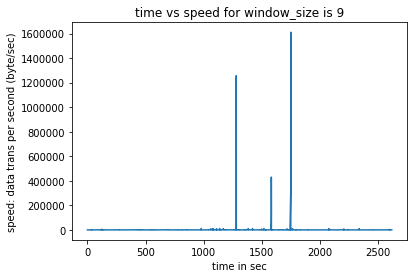

In [161]:
speed_with_data_over_time(df = pd.read_csv(seprate_paths['invoke_nodup'][12]), window_size = 9)

In [162]:
obj = ipwhois.IPWhois('224.0.0.251')

IPDefinedError: IPv4 address 224.0.0.251 is already defined as Multicast via RFC 3171.

In [163]:
obj.lookup_whois()

NameError: name 'obj' is not defined

In [164]:
destinations = df.destination
destinations = set(destinations)

In [165]:
private_pat = re.compile(r"^(?:10|127|172\.(?:1[6-9]|2[0-9]|3[01])|192\.168)\..*")
md5_pat = re.compile(r"^([0-9A-Fa-f]{2}[:-]){5}([0-9A-Fa-f]{2})$")
ipaddress_pat = re.compile(r'\b((25[0-5]|2[0-4][0-9]|[01]?[0-9][0-9]?)(\.|$)){4}\b')

In [166]:
ipaddress_pat.match("225.225.225.225")

<re.Match object; span=(0, 15), match='225.225.225.225'>

In [167]:
ipaddress_pat.match("trouter-cus-b.cloudapp.net")

In [168]:
private_pat.match("127.0.0.0")

<re.Match object; span=(0, 9), match='127.0.0.0'>

In [169]:
md5_pat.match("d8:f7:10:c3:34:e4")

<re.Match object; span=(0, 17), match='d8:f7:10:c3:34:e4'>

In [170]:
whois.query('nblx-1.neu.edu').__dict__

{'name': 'neu.edu',
 'registrar': '',
 'creation_date': datetime.datetime(1993, 3, 24, 0, 0),
 'expiration_date': datetime.datetime(2021, 7, 31, 0, 0),
 'last_updated': datetime.datetime(2018, 8, 13, 0, 0),
 'status': '',
 'name_servers': {'nb4277.neu.edu', 'ns29.customer.level3.net'}}

In [171]:
for ip in destinations:
    if private_pat.match(ip):
        continue
    if ip.endswith('.local'):
        continue
    if md5_pat.match(ip):
        continue
    
    if ipaddress_pat.match(ip):
        #ipaddress
        try:
            obj = ipwhois.IPWhois(ip)
            ip_owner = obj.lookup_whois().get('nets')[0].get('name')
        except:
            pass
    else:
        try:
            ip_owner = whois.query(ip).registrar
        except:
            pass

In [172]:
def get_destination_owners(destinations):
    res = []
    destinations_nodup = set(destinations)
    destinations_owner_nodup = {}
    for ip in destinations_nodup:
            
        if private_pat.match(ip):
            destinations_owner_nodup[ip] = 'Local'
            continue
        if ip.endswith('.local'):
            destinations_owner_nodup[ip] = 'Local'
            continue
        if md5_pat.match(ip):
            destinations_owner_nodup[ip] = 'Local'
            continue

        if ipaddress_pat.match(ip):
            #ipaddress
            try:
                obj = ipwhois.IPWhois(ip)
                ip_owner = obj.lookup_whois().get('nets')[0].get('emails')[0].split('@')[1]
                destinations_owner_nodup[ip] = ip_owner
            except:
                pass
        else:
            try:
                #website
                ip_address = socket.gethostbyname(ip)
                
#                 if ip == 'dual-a-0001.a-msedge.net':
#                     print(ip_address)
#                     obj = ipwhois.IPWhois(ip_address)
#                     print(obj.lookup_whois().get("nets")[0].get('name'))
                obj = ipwhois.IPWhois(ip_address)
                ip_owner = obj.lookup_whois().get('nets')[0].get('emails')[0].split('@')[1]
#                 print(ip, obj.lookup_whois())
                destinations_owner_nodup[ip] = ip_owner
            
            except:
                pass
#     print(destinations_owner_nodup.get('dual-a-0001.a-msedge.net'))
    #print(destinations_owner_nodup)
    for ip in destinations:
        if ip in destinations_owner_nodup:
            res.append(destinations_owner_nodup.get(ip))    
        else:
            res.append(None)
    return res

In [173]:
df = pd.read_csv(seprate_paths['invoke_nodup'][12])
destination_owner = get_destination_owners(df.destination)

In [174]:
Counter(destination_owner)

Counter({None: 66,
         'microsoft.com': 1083,
         'Local': 1018,
         'neu.edu': 6,
         'level3.com': 4})

In [175]:
ip_str = socket.gethostbyname("www.bing.com")
obj = ipwhois.IPWhois(ip_str)
# print(obj.lookup_whois())
obj.lookup_whois().get('nets')[0].get('emails')

['msndcc@microsoft.com', 'IOC@microsoft.com', 'abuse@microsoft.com']

In [176]:
destination_owner

[None,
 'microsoft.com',
 'Local',
 'microsoft.com',
 'microsoft.com',
 'Local',
 'Local',
 'Local',
 'microsoft.com',
 'microsoft.com',
 'Local',
 'microsoft.com',
 None,
 None,
 'Local',
 'microsoft.com',
 'Local',
 'Local',
 'Local',
 'microsoft.com',
 'Local',
 'Local',
 'Local',
 'Local',
 'Local',
 'Local',
 'microsoft.com',
 'Local',
 'microsoft.com',
 'Local',
 'microsoft.com',
 'microsoft.com',
 'Local',
 'Local',
 'Local',
 'microsoft.com',
 'microsoft.com',
 'Local',
 'microsoft.com',
 'Local',
 'microsoft.com',
 None,
 'microsoft.com',
 'Local',
 'Local',
 'Local',
 'microsoft.com',
 'Local',
 'Local',
 'Local',
 'microsoft.com',
 'Local',
 'microsoft.com',
 None,
 'microsoft.com',
 'Local',
 'Local',
 'Local',
 'microsoft.com',
 'microsoft.com',
 'Local',
 'microsoft.com',
 'microsoft.com',
 'Local',
 'Local',
 'Local',
 'microsoft.com',
 'microsoft.com',
 'Local',
 'microsoft.com',
 'Local',
 'microsoft.com',
 'Local',
 'Local',
 'microsoft.com',
 'Local',
 'microsoft.com

In [177]:
Counter(destination_owner)

Counter({None: 66,
         'microsoft.com': 1083,
         'Local': 1018,
         'neu.edu': 6,
         'level3.com': 4})

In [178]:
whois.query('nblx-1.neu.edu').__dict__

{'name': 'neu.edu',
 'registrar': '',
 'creation_date': datetime.datetime(1993, 3, 24, 0, 0),
 'expiration_date': datetime.datetime(2021, 7, 31, 0, 0),
 'last_updated': datetime.datetime(2018, 8, 13, 0, 0),
 'status': '',
 'name_servers': {'nb4277.neu.edu', 'ns29.customer.level3.net'}}

In [179]:
speed_slide_window_with_packet_size(df)

[157.81443207331628,
 208.6308939150677,
 189.4115216108814,
 128.0734827224378,
 26710.402999062713,
 38.12293640545237,
 43.758928416774616,
 41.829138603332154,
 26.38688463613956,
 78.10159751851164,
 62.93130489335009,
 58.47533484951986,
 10480.189884973954,
 12056.996711727628,
 13137.465663440098,
 27430.221366702335,
 65.0252899661953,
 66.29546852469075,
 55.44079660167579,
 55.45115313819114,
 61.72199102010691,
 63.03577674303769,
 91.15664965541391,
 98.55369932121138,
 421.8036515992437,
 527.4630514872848,
 10153.021613363526,
 832.8301011227838,
 794.9360535093892,
 417.2441818059241,
 192.10325387096262,
 21017.699115043306,
 771.7588206943491,
 777.0343604786274,
 1515.8696198621083,
 1802.7236179193671,
 10184.365187988255,
 246.40985529108977,
 125.9029467527329,
 68.7321667404901,
 39.52404951705875,
 80.6528077016424,
 27327.207351161982,
 58.55383151462483,
 59.74485177024391,
 51.194173547454675,
 27.7345967766722,
 69.83858420821394,
 71.41359949345406,
 91.604

In [180]:
speed_destination_owner = zip(speed_slide_window_with_packet_size(df), get_destination_owners(df.destination), df.destination, df.length, df.time)

In [181]:
speed_destination_owner = list(speed_destination_owner)

In [182]:
#speed_destination_owner.sort(key=lambda x : x[0], reverse=True)

In [183]:
speed_destination_owner[:10]

[(157.81443207331628, None, '224.0.0.251', 327, 0.0),
 (208.6308939150677, 'microsoft.com', '52.242.211.89', 144, 2.613452),
 (189.4115216108814, 'Local', 'Invoke_C334E4.local', 224, 2.65027),
 (128.0734827224378, 'microsoft.com', '52.242.211.89', 54, 2.651401),
 (26710.402999062713, 'microsoft.com', 'a-0001.a-msedge.net', 89, 5.310034),
 (38.12293640545237, 'Local', 'Invoke_C334E4.local', 54, 5.321584),
 (43.758928416774616, 'Local', 'Invoke_C334E4.local', 85, 5.321701999999999),
 (41.829138603332154, 'Local', 'Invoke_C334E4.local', 60, 5.321743),
 (26.38688463613956, 'microsoft.com', 'a-0001.a-msedge.net', 54, 5.322838),
 (78.10159751851164, 'microsoft.com', '40.83.21.197', 122, 15.158182)]

In [184]:
list(filter(lambda x : x[1] != 'Local', speed_destination_owner))[:10]

[(157.81443207331628, None, '224.0.0.251', 327, 0.0),
 (208.6308939150677, 'microsoft.com', '52.242.211.89', 144, 2.613452),
 (128.0734827224378, 'microsoft.com', '52.242.211.89', 54, 2.651401),
 (26710.402999062713, 'microsoft.com', 'a-0001.a-msedge.net', 89, 5.310034),
 (26.38688463613956, 'microsoft.com', 'a-0001.a-msedge.net', 54, 5.322838),
 (78.10159751851164, 'microsoft.com', '40.83.21.197', 122, 15.158182),
 (58.47533484951986, 'microsoft.com', '40.83.21.197', 66, 15.195243),
 (10480.189884973954, None, 'LibreWir_c3:34:e4', 42, 20.292396),
 (12056.996711727628, None, 'LibreWir_c3:34:e4', 60, 20.29252),
 (27430.221366702335,
  'microsoft.com',
  'a-0001.a-msedge.net',
  89,
  20.308510000000002)]

In [185]:
socket.gethostbyname('dual-a-0001.a-msedge.net')

'13.107.21.200'

In [186]:
obj = ipwhois.IPWhois('13.107.21.200')
obj.lookup_whois().get('nets')[0].get('name')

'MSFT'

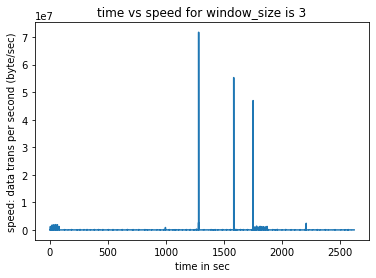

In [187]:
speed_with_data_over_time(df,  3)

In [188]:
destination = set()
for item in speed_destination_owner:
    destination.add(item[1])

In [189]:
destination

{'Local', None, 'level3.com', 'microsoft.com', 'neu.edu'}

In [206]:
speed_destination_owner_copy = deepcopy(speed_destination_owner)

In [207]:
#[(speed of packet, ms := 1/ non-ms != 0, timestamp)]
speed_destination_owner_processed = []
for idx in range(len(speed_destination_owner_copy)):
    if speed_destination_owner[idx][1] == 'microsoft.com':
        speed_destination_owner_processed.append((speed_destination_owner[idx][0], 1, speed_destination_owner[idx][-1], idx))
    elif speed_destination_owner[idx][1] == 'Local':
        pass
        #speed_destination_owner_processed.append((speed_destination_owner[idx][0], 2, speed_destination_owner[idx][-1], idx))
    else:
        speed_destination_owner_processed.append((speed_destination_owner[idx][0], 0, speed_destination_owner[idx][-1], idx))

In [208]:
data = np.asarray(speed_destination_owner_processed)

In [209]:
filter(lambda x : x[1] speed_destination_owner_processed)

SyntaxError: invalid syntax (<ipython-input-209-2bd8c2526348>, line 1)

1159 1159


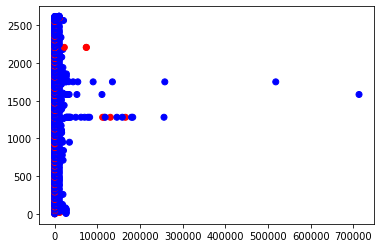

In [210]:
color_set = {0 : 'r' , 1: 'b', 2: 'w'}
color_list = []
for val in data:
    color_list.append(color_set.get(val[1]))

    
print(len(color_list), len(data))
plt.scatter(data[:, 0], data[:, 2], c = color_list)

In [211]:
speed_destination_owner[1077]

(89193.24066497925, 'Local', 'd8:f7:10:c3:34:e4-0.local', 2354, 1281.732364)

In [212]:
sorted(speed_destination_owner_processed, key = lambda x : x[0], reverse=True)

[(713453.3898274455, 1, 1583.081174, 1337),
 (518250.6887152168, 1, 1750.317804, 1498),
 (258183.98535445463, 1, 1750.3086289999999, 1497),
 (256300.72619769987, 1, 1281.2988890000001, 1049),
 (183028.2861786166, 1, 1281.299435, 1050),
 (180102.20193528253, 1, 1281.311983, 1055),
 (165893.86914064607, 0, 1280.933438, 1031),
 (158509.77815956002, 1, 1281.301238, 1054),
 (145835.20129103702, 1, 1281.209665, 1045),
 (135411.3000153681, 1, 1750.549575, 1517),
 (130569.14757103077, 0, 1280.933334, 1030),
 (118427.53705607224, 1, 1281.30123, 1053),
 (116190.95731219063, 0, 1280.9335210000002, 1033),
 (112445.09517152043, 0, 1280.9334800000001, 1032),
 (110916.94267064599, 1, 1582.987245, 1336),
 (90211.58978367526, 1, 1750.3558480000002, 1508),
 (82004.7865670778, 1, 1281.301193, 1052),
 (77938.44196509132, 1, 1281.1275679999999, 1044),
 (74266.85286269257, 0, 2207.344712, 1871),
 (74127.07498953618, 0, 2207.344637, 1870),
 (70167.97788551275, 1, 1281.381649, 1059),
 (61770.320506405544, 1, 

In [213]:
#[(speed of packet, ms := 1/ non-ms != 0, timestamp)]

In [214]:
outlier_data = data[is_outlier(data[:, 0], 20)]

In [215]:
# res = []
# for idx in outlier_data:
#     if idx:
#         res 

In [216]:
outlier_data

array([[2.67104030e+04, 1.00000000e+00, 5.31003400e+00, 4.00000000e+00],
       [2.74302214e+04, 1.00000000e+00, 2.03085100e+01, 1.50000000e+01],
       [2.10176991e+04, 1.00000000e+00, 3.53139680e+01, 3.10000000e+01],
       [2.73272074e+04, 1.00000000e+00, 5.03149110e+01, 4.20000000e+01],
       [2.71127319e+04, 1.00000000e+00, 6.53089690e+01, 5.40000000e+01],
       [2.52715584e+04, 1.00000000e+00, 8.03142860e+01, 6.20000000e+01],
       [1.95145749e+04, 1.00000000e+00, 2.58627240e+02, 2.05000000e+02],
       [1.97777778e+04, 1.00000000e+00, 7.12060851e+02, 5.20000000e+02],
       [2.07207642e+04, 1.00000000e+00, 8.40197580e+02, 6.17000000e+02],
       [1.87397465e+04, 1.00000000e+00, 9.50144124e+02, 6.82000000e+02],
       [3.46867875e+04, 1.00000000e+00, 9.50199133e+02, 6.83000000e+02],
       [1.99477677e+04, 1.00000000e+00, 1.26158874e+03, 1.01500000e+03],
       [1.30569148e+05, 0.00000000e+00, 1.28093333e+03, 1.03000000e+03],
       [1.65893869e+05, 0.00000000e+00, 1.28093344e

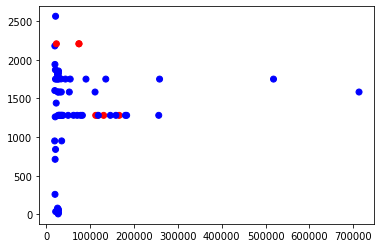

In [217]:
color_set = {0 : 'r' , 1: 'b'}
color_list = []
for val in outlier_data:
    #print(val)
    color_list.append(color_set.get(val[1]))

    
#print(len(color_list), len(outlier_data))
plt.scatter(outlier_data[:, 0], outlier_data[:, 2], c = color_list)

In [218]:
temp = []

In [52]:
class timestampfilter:
    #find out MS related peaks and return the series of timestamp.
    def __init__(self, dataframe):
        self.dataframe = dataframe
        self.private_pat = re.compile(r"^(?:10|127|172\.(?:1[6-9]|2[0-9]|3[01])|192\.168)\..*")
        #filter out private ip address, md5, ip_address.
        self.md5_pat = re.compile(r"^([0-9A-Fa-f]{2}[:-]){5}([0-9A-Fa-f]{2})$")
        self.ipaddress_pat = re.compile(r'\b((25[0-5]|2[0-4][0-9]|[01]?[0-9][0-9]?)(\.|$)){4}\b')
        self.data = None
        self.destination_owners = None
        self.window_size = len(dataframe)//50

    def _generate_speed(self, window_length = 1):
        if self.destination_owners is None:
            self.generate_destination_owners()
        
        timestamps = self.dataframe.time
        data_volume = self.dataframe.length
        res = []
        data_queue = deque([])
        time_queue = deque([])

        for idx, (timestamp, length) in enumerate(zip(timestamps, data_volume)):
            data_queue.append(length)
            time_queue.append(timestamp)
            if self.destination_owners[idx] == 'Local':
                continue
            if time_queue[-1] - time_queue[0] > window_length:
                speed = sum(data_queue) / (time_queue[-1] - time_queue[0])
                res.append(speed)
                data_queue.popleft()
                time_queue.popleft()
        
#         for _ in range(1, len(time_queue)):
#             res.append(speed)
        return res
    
    def _generate_owner(self, addresses):
        """
        address: series of ipadddress/domain
        three kinds of owner: 
        Local(for the private ip address and .local MD5),
        address like: neu.edu or microsoft.com
        None: all others.
        """
        res = []
        destinations_nodup = set(addresses)
        destinations_owner_nodup = {}
        
        for ip in destinations_nodup:

            if self.private_pat.match(ip):
                destinations_owner_nodup[ip] = 'Local'
                continue
            if ip.endswith('.local'):
                destinations_owner_nodup[ip] = 'Local'
                continue
            if self.md5_pat.match(ip):
                destinations_owner_nodup[ip] = 'Local'
                continue

            if self.ipaddress_pat.match(ip):
                #ipaddress
                try:
                    obj = ipwhois.IPWhois(ip)
                    ip_owner = obj.lookup_whois().get('nets')[0].get('emails')[0].split('@')[1]
                    destinations_owner_nodup[ip] = ip_owner
                except:
                    pass
            else:
                try:
                    #website
                    ip_address = socket.gethostbyname(ip)
                    obj = ipwhois.IPWhois(ip_address)
                    ip_owner = obj.lookup_whois().get('nets')[0].get('emails')[0].split('@')[1]
                    destinations_owner_nodup[ip] = ip_owner
                except:
                    pass
                
        for ip in addresses:
            if ip in destinations_owner_nodup:
                res.append(destinations_owner_nodup.get(ip))
            else:
                res.append(None)
        return res
    
    def generate_speed(self):
        self.speeds = self._generate_speed(self.window_size)
    
    def generate_destination_owners(self):
        if not self.destination_owners:
            self.destination_owners = self._generate_owner(self.dataframe.destination)
    
    def get_plot(self, show_local = False, update_data = True):
        if update_data:
            self.data = []
            for idx, (time, speed, owner) in enumerate(zip(self.dataframe.time, self.speeds, self.destination_owners)):
                if show_local == False and owner == 'Local':
                    continue
                self.data.append((time, speed, owner, idx))

            self.data = np.asarray(self.data)
        color_set = {None : 'r' , 'microsoft.com': 'b'}

        color_list = []
        for val in self.data:
            #print(val)
            color_list.append(color_set.get(val[2], 'r'))

        #print(len(color_list), len(outlier_data))
        plt.scatter(self.data[:, 0], self.data[:, 1], c = color_list, alpha = 0.2)
        plt.xlabel("time in sec")
        plt.ylabel("packet speed byte/s")
    
    def get_activations(self):
        time_elaspe = self.data[-1][0] - self.data[0][0]
        res = []
        reset = True
        
        max_speed_to_ms = 0
        max_speed = 0
        max_speed_to_non_ms = 0
        
        for time, speed, owner, idx in self.data:
            #print(time, speed, owner, idx)
                
                if owner == 'microsoft.com':
                    max_speed_to_ms = max(max_speed_to_ms, speed)
                elif owner is None:
                    max_speed_to_non_ms = max(max_speed_to_non_ms, speed)
                
                max_speed = max(speed, max_speed)
                    
        res.append({
            "max_speed_to_ms": max_speed_to_ms,
            "max_speed": max_speed,
            "max_speed_to_non_ms": max_speed_to_non_ms
        })
                
        return res

In [220]:
# presentation[5min]:
# work: pcap -> time of activations [1 slides]
# methods: 1. methology to find the peaks [high level] [1 slide]
# results, what did accomplish [1 slides]

# POLISH the plot!!!!!!!!!

#data source, m$ data.

In [221]:
df = pd.read_csv(seprate_paths['invoke_nodup'][2])
df_timeclassfier = timestampfilter(df)

In [222]:
df_timeclassfier.generate_speed()

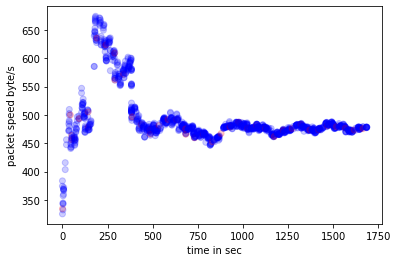

In [223]:
df_timeclassfier.get_plot(False, True)

In [224]:
df_timeclassfier.data = df_timeclassfier.data[is_outlier(df_timeclassfier.data[:, 1].astype(float), 3),]

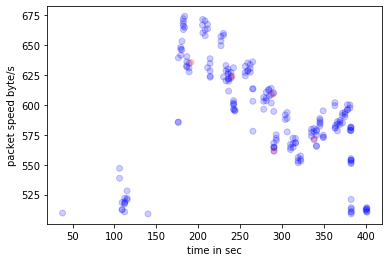

In [225]:
df_timeclassfier.get_plot(False, False)

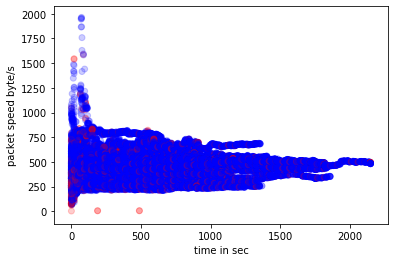

In [226]:
background_res = {}
for path in seprate_paths['invoke_nodup']:
    df = pd.read_csv(path)
    df_timeclassfier = timestampfilter(df)
    df_timeclassfier.generate_destination_owners()
    df_timeclassfier.generate_speed()
    df_timeclassfier.get_plot(False,True)
    df_timeclassfier.data = df_timeclassfier.data[~is_outlier(df_timeclassfier.data[:, 1].astype(float), 3.5),]
    background_res[path] = df_timeclassfier.get_activations()

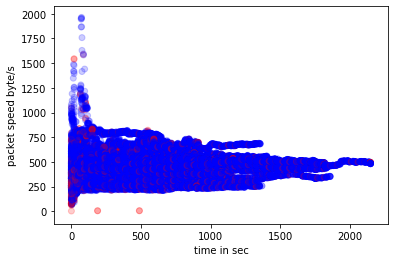

In [227]:
peak_res = {}
for path in seprate_paths['invoke_nodup']:
    df = pd.read_csv(path)
    df_timeclassfier = timestampfilter(df)
    df_timeclassfier.generate_destination_owners()
    df_timeclassfier.generate_speed()
    df_timeclassfier.get_plot(False, True)
    df_timeclassfier.data = df_timeclassfier.data[is_outlier(df_timeclassfier.data[:, 1].astype(float), 3.5),]
    if len(df_timeclassfier.data) == 0:
        continue
    peak_res[path] = df_timeclassfier.get_activations()

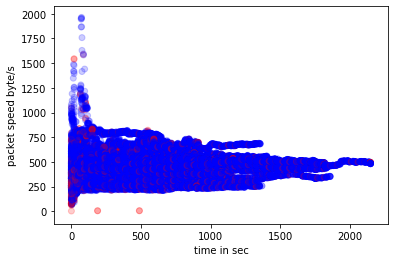

In [228]:
overall_res = {}
for path in seprate_paths['invoke_nodup']:
    df = pd.read_csv(path)
    df_timeclassfier = timestampfilter(df)
    df_timeclassfier.generate_destination_owners()
    df_timeclassfier.generate_speed()
    df_timeclassfier.get_plot(False, True)
    #df_timeclassfier.data = df_timeclassfier.data[is_outlier(df_timeclassfier.data[:, 1].astype(float), 3.5),]
    #if len(df_timeclassfier.data) == 0:
        #continue
    overall_res[path] = df_timeclassfier.get_activations()

In [229]:
all_peaks = []
for peak in peak_res.values():
    all_peaks += peak
all_backgrounds = []
for bg in background_res.values():
    all_backgrounds += bg
all_overall = []
for obj in background_res.values():
    all_overall += obj

In [230]:
overall_max_speed_to_ms = []
overall_max_speed = []
overall_max_speed_to_non_ms = []
for obj in all_overall:
    overall_max_speed_to_ms.append(obj.get("max_speed_to_ms"))
    overall_max_speed.append(obj.get("max_speed"))
    overall_max_speed_to_non_ms.append(obj.get("max_speed_to_non_ms"))

In [231]:
background_max_speed_to_ms = []
background_max_speed = []
background_max_speed_to_non_ms = []
for obj in all_backgrounds:
    background_max_speed_to_ms.append(obj.get("max_speed_to_ms"))
    background_max_speed.append(obj.get("max_speed"))
    background_max_speed_to_non_ms.append(obj.get("max_speed_to_non_ms"))

In [232]:
peaks_max_speed_to_ms = []
peaks_max_speed = []
peaks_max_speed_to_non_ms = []
for obj in all_peaks:
    peaks_max_speed_to_ms.append(obj.get("max_speed_to_ms"))
    peaks_max_speed.append(obj.get("max_speed"))
    peaks_max_speed_to_non_ms.append(obj.get("max_speed_to_non_ms"))

Text(0, 0.5, 'ECDF')

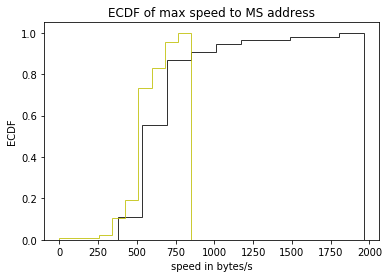

In [233]:
temp_1 = np.asarray(peaks_max_speed_to_ms)
plt.hist(temp_1, density=True, cumulative=True, label='CDF',
         histtype='step', alpha=0.8, color='k')
temp = np.asarray(background_max_speed_to_ms)
plt.hist(temp, density=True, cumulative=True, label='CDF',
         histtype='step', alpha=0.8, color='y')
plt.title("ECDF of max speed to MS address")
plt.xlabel("speed in bytes/s")
plt.ylabel("ECDF")

Text(0, 0.5, 'ECDF')

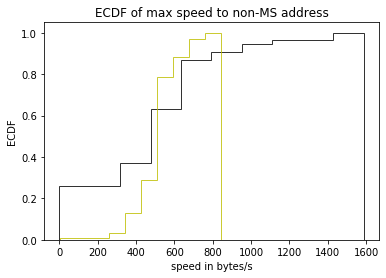

In [234]:
temp_1 = np.asarray(peaks_max_speed_to_non_ms)
plt.hist(temp_1, density=True, cumulative=True, label='CDF',
         histtype='step', alpha=0.8, color='k')
temp = np.asarray(background_max_speed_to_non_ms)
plt.hist(temp, density=True, cumulative=True, label='CDF',
         histtype='step', alpha=0.8, color='y')
plt.title("ECDF of max speed to non-MS address")
plt.xlabel("speed in bytes/s")
plt.ylabel("ECDF")

Text(0, 0.5, 'ECDF')

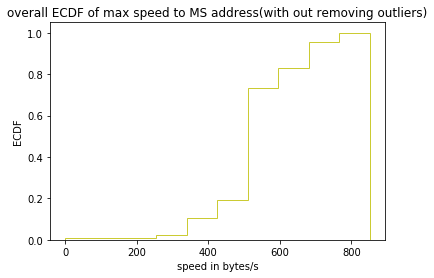

In [235]:
temp = np.asarray(overall_max_speed_to_ms)
plt.hist(temp, density=True, cumulative=True, label='CDF',
         histtype='step', alpha=0.8, color='y')
plt.title("overall ECDF of max speed to MS address(with out removing outliers)")
plt.xlabel("speed in bytes/s")
plt.ylabel("ECDF")

In [236]:
len(background_max_speed_to_ms)

93

In [237]:
len(overall_max_speed_to_ms)

93

### Rework with the sliding window to compute the right speed

In [238]:
df.time

0          0.000000
1          3.409743
2          3.447782
3          3.454809
4          7.545973
           ...     
5294    4011.687563
5295    4011.699798
5296    4011.701409
5297    4011.713682
5298    4011.745615
Name: time, Length: 5299, dtype: float64

In [239]:
redev = timestampfilter(df)

In [240]:
redev.generate_destination_owners()

In [241]:
time, length, owners = df.time, df.length, redev.destination_owners

In [242]:
len(time) == len(length) == len(owners)

True

In [243]:
def filter_out_local(time, length, owners):
    filtered_time = []
    filtered_length = []
    filtered_owners = []
    
    for t, l, o in zip(time, length, owners):
        if o == 'Local':
            filtered_time.append(t)
            filtered_length.append(0)
            filtered_owners.append(o)
            continue
        filtered_time.append(t)
        filtered_length.append(l)
        filtered_owners.append(o)
    return filtered_time, filtered_length, filtered_owners

In [244]:
def computer_speed(timestamp, length):
    time_queue = deque([])
    data_queue = deque([])
    speeds = []
    
    lspeed = 0
    for idx in range(len(timestamp)):
        tmstp = timestamp[idx]
        data_sent = length[idx]
        
        time_queue.append(tmstp)
        data_queue.append(data_sent)
        
        newest = time_queue[-1]
        oldest = time_queue[0]
        
        if newest - oldest > 1:
            
            speed = sum(data_queue)/(newest - oldest)
            
            speeds.append(speed)
            
            time_queue = deque([])
            data_queue = deque([])
    return speeds

def sample_out_peaks(timestamp, length):
    res = []
#     total_length = timestamp[-1] - timestamp[0]
    
    data_queue = deque([])
    time_queue = deque([])
    #(total volume, [time stamp], [packet_length])
    for idx in range(len(timestamp)):
        data_queue.append(length[idx])
        time_queue.append(timestamp[idx])
        
        if time_queue[-1] - time_queue[0] > 20:
            res.append((sum(data_queue), list(time_queue), list(data_queue)))
            data_queue = deque([])
            time_queue = deque([])
    return res

def sample_and_computer_speed(timestamp, length):
    sampled = sample_out_peaks(timestamp, length)
    _, sampled_time, sampled_data = sorted(sampled, key = lambda x : -x[0])[0]
    return computer_speed(sampled_time, sampled_data)

In [246]:
max(computer_speed(filtered_time, filtered_length))

NameError: name 'filtered_time' is not defined

In [247]:
max(computer_speed(time, length))

52153.66429559277

In [248]:
#should greater than 17000 bytes

In [249]:
max_speed = []
idxes = []
for idx, path in enumerate(seprate_paths['invoke_nodup']):
    df = pd.read_csv(path)
    if len(df) < 500:
        continue
    redev = timestampfilter(df)
    redev.generate_destination_owners()
    time, length, owners = filter_out_local(df.time, df.length, redev.destination_owners)
    time,length = df.time, df.length
    idxes.append(idx)
    max_speed.append(max(computer_speed(time, length)))


In [250]:
sorted(max_speed)

[3046.931680248711,
 3800.4542256609,
 3819.6428724246744,
 4015.0108553634204,
 4040.124250638152,
 4138.283936060356,
 4173.200665184079,
 4235.749246032854,
 4313.340741481454,
 4674.98880986764,
 5842.573017636071,
 6698.998919856389,
 9083.414729234255,
 9337.307807037272,
 9508.21042328237,
 9714.39519303216,
 9900.521116247672,
 9976.043977520723,
 10522.56983157526,
 10542.500375265327,
 10566.395586080618,
 10788.623824551112,
 10849.379567876957,
 11508.51354574313,
 11859.294291609935,
 11957.6416662658,
 12251.984588764835,
 12550.570115284147,
 13217.25411206953,
 13645.377814365256,
 14156.90253078629,
 14244.551579686235,
 14360.253459389298,
 14513.655774114308,
 14640.314331364772,
 14902.422785627577,
 15515.744186788315,
 15555.731029114648,
 15830.760899906863,
 16132.826154900416,
 16374.200578471671,
 16783.77670454953,
 17403.333014174976,
 17458.1475998276,
 17796.217866639967,
 17866.55074083624,
 18830.739662280423,
 19233.280132203698,
 19514.996537948802,
 1

In [251]:
len(max_speed)

92

In [252]:
np.argmin(max_speed)

49

In [267]:
idxes[49]

49

In [268]:
max_speed[49]

3046.931680248711

In [269]:
minimum_df = pd.read_csv(seprate_paths['invoke_nodup'][49])

In [270]:
max(computer_speed(minimum_df.time, minimum_df.length))

3046.931680248711

In [271]:
sorted(sample_out_peaks(minimum_df.time, minimum_df.length), key = lambda x : -x[0])

[(18992,
  [166.535993,
   166.537421,
   166.631892,
   166.666841,
   169.44611899999998,
   169.54025,
   169.543343,
   169.637808,
   169.67783400000002,
   172.45471899999998,
   172.548787,
   172.54976200000002,
   172.644407,
   172.677041,
   175.45195800000002,
   175.545944,
   175.54884199999998,
   175.64313,
   175.676895,
   178.46536,
   178.559552,
   178.560529,
   178.655475,
   178.687026,
   181.06575700000002,
   181.101365,
   181.10218400000002,
   181.456384,
   181.550627,
   181.55151899999998,
   181.645896,
   181.67139,
   181.765657,
   181.766577,
   181.860965,
   181.897108,
   183.625807,
   183.662397,
   183.663172,
   184.467125,
   184.562523,
   184.563479,
   184.709397,
   184.91122099999998,
   184.932872,
   185.084476,
   185.087195,
   185.09051399999998,
   185.127254,
   185.181645,
   185.182639,
   186.137021,
   186.137156,
   186.137722,
   191.988954],
  [120,
   857,
   492,
   66,
   490,
   120,
   859,
   492,
   66,
   490,
   

Text(0, 0.5, 'ECDF')

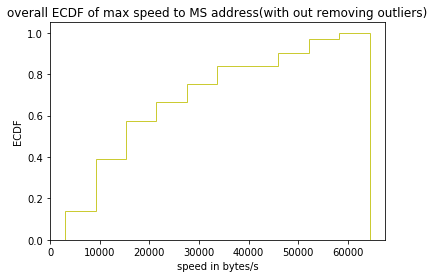

In [258]:
temp = np.asarray(max_speed)
plt.hist(temp, density=True, cumulative=True, label='CDF',
         histtype='step', alpha=0.8, color='y')
plt.title("overall ECDF of max speed to MS address(with out removing outliers)")
plt.xlabel("speed in bytes/s")
plt.ylabel("ECDF")

In [259]:
len(max_speed)

92

In [260]:
len(seprate_paths['invoke_nodup'])

93

In [272]:
df_timeclassfier = timestampfilter(minimum_df)

In [273]:
df_timeclassfier.generate_speed()

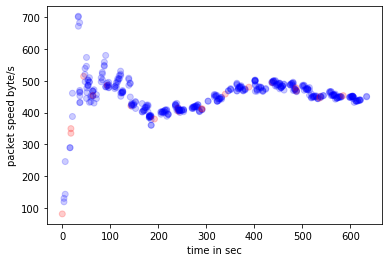

In [274]:
df_timeclassfier.get_plot(False, True)

In [275]:
seprate_paths['invoke_nodup'][49]

'/Users/kuangwenyi/Documents/Development/master-research/activations-final1a/[S12.Ep23] The Big Bang Theory - The Change Constant/invoke_nodup.csv'

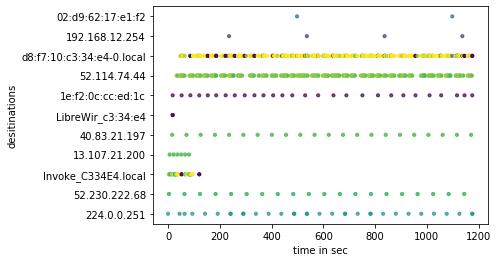

In [276]:
plot_timeline_vs_dest_prot(minimum_df)

In [266]:
# _, time, data= sorted(sample_out_peaks(filtered_time, filtered_length), key = lambda x : -x[0])[0]

NameError: name 'filtered_time' is not defined

In [ ]:
min(computer_speed(time, data))

## Compute the idle activation

In [62]:
cnt = 0
idle_pcap_file_paths = []
for f in walk(sys.path[0]):
    cnt += 1
    folder_name = f[0]
#     for iterable in f:
#         if type(iterable) is list:
#             for item in iterable:
#                 if not item.endswith('_nodup.pcap'):
#                     continue
#                 if item.split(".")[-1] == 'pcap':
#                     file_path = folder_name + "/"+ item
#                     paths_pcap.append(file_path)
                    
# path.exists(paths_pcap[0])
    if 'iot-idle' in folder_name and "invoke" in folder_name:
        for iterable in f:
            if type(iterable) is list:
                for item in iterable:
                    if not item.endswith('.pcap'):
                        continue
                    else:
                        file_path = folder_name + "/"+ item
                        idle_pcap_file_paths.append(file_path)

In [296]:
%%time
generate_result_from_tshark(idle_pcap_file_paths)

CPU times: user 346 ms, sys: 169 ms, total: 515 ms
Wall time: 1min 25s


In [63]:
idle_txt_file_paths = []
for pcap_path in idle_pcap_file_paths:
    idle_txt_file_paths.append(pcap_path.replace('.pcap', '.txt'))

In [66]:
import os
os.path.exists(idle_txt_file_paths[0])

True

In [67]:
def convert_plain_txt_to_csv(tshark_res):
    columns = ['time', 'source', 'destination', 'protocol', 'length', 'Info']
    cnt = 0

    target_csv_paths = []
    tshark_plain_paths = tshark_res
    for path in tshark_res:
        target_csv_paths.append(path[:-3] + 'csv')

    for csv_path, plain_path in zip(target_csv_paths, tshark_plain_paths):
        cnt += 1
        if cnt % 100 == 0:
            print(cnt)
        with open(csv_path, 'w') as csv:
            csv.write(",".join(columns) + '\n')
            with open(plain_path, 'r') as plain:
                for line in plain:
                    if line == '\n' or line == '':
                        continue
                    csv_line = convert_plain_to_csv(line)
                    csv.write(csv_line)
    return target_csv_paths

In [69]:
idle_csv_paths = convert_plain_txt_to_csv(idle_txt_file_paths)

#idle_csv_paths

In [70]:
idle_df = pd.read_csv(idle_csv_paths[0])

In [71]:
idle_analyser = timestampfilter(idle_df)

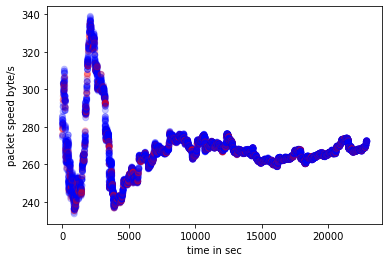

In [72]:
idle_analyser.generate_speed()
idle_analyser.get_plot(False, True)

In [373]:
max(computer_speed(idle_df.time, idle_df.length))

34984.55435765264

In [381]:
time, length, owners = filter_out_local(idle_df.time, idle_df.length, idle_analyser.destination_owners)
max(sample_and_computer_speed(time, length))

7398.567305853987

In [73]:
class bandwithCaculator:
    
    def __init__(self, df):
        self.dataframe = df
        self.owners = None
        self.destination_owner = {}
        self.private_pat = re.compile(r"^(?:10|127|172\.(?:1[6-9]|2[0-9]|3[01])|192\.168)\..*")
        #filter out private ip address, md5, ip_address.
        self.md5_pat = re.compile(r"^([0-9A-Fa-f]{2}[:-]){5}([0-9A-Fa-f]{2})$")
        self.ipaddress_pat = re.compile(r'\b((25[0-5]|2[0-4][0-9]|[01]?[0-9][0-9]?)(\.|$)){4}\b')
        
        
        self.non_local_mask = np.array([])
    def _get_owners(self, addresses):
        res = []
        destinations_nodup = set(addresses)
        destinations_owner_nodup = {}
        
        for ip in destinations_nodup:
            if ip in self.destination_owner:
                continue
                
            if self.private_pat.match(ip):
                destinations_owner_nodup[ip] = 'Local'
                continue
            if ip.endswith('.local'):
                destinations_owner_nodup[ip] = 'Local'
                continue
            if self.md5_pat.match(ip):
                destinations_owner_nodup[ip] = 'Local'
                continue

            if self.ipaddress_pat.match(ip):
                #ipaddress
                try:
                    obj = ipwhois.IPWhois(ip)
                    ip_owner = obj.lookup_whois().get('nets')[0].get('emails')[0].split('@')[1]
                    destinations_owner_nodup[ip] = ip_owner
                except:
                    pass
            else:
                try:
                    #website
                    ip_address = socket.gethostbyname(ip)
                    obj = ipwhois.IPWhois(ip_address)
                    ip_owner = obj.lookup_whois().get('nets')[0].get('emails')[0].split('@')[1]
                    destinations_owner_nodup[ip] = ip_owner
                except:
                    pass
                
        self.destination_owner.update(destinations_owner_nodup)       
        for ip in addresses:
            if ip in self.destination_owner:
                res.append(self.destination_owner.get(ip))
            else:
                res.append('Other')
                
        return res
    
    def generate_destination_owner_column(self):
        self.dataframe['destination_owner'] = np.asarray(self._get_owners(self.dataframe.destination))
    
    def generate_source_owner_column(self):
        res = np.asarray(self._get_owners(self.dataframe.source))
        print(res)
        self.dataframe['source_owner'] = res
    
    
    def _average_maxium_bandwidth(self, df):
        data = df.length
        timestamps = df.time


        large_windows = []
        large_window = []
        small_window = []

        for datrum, timestamp in zip(data, timestamps):
            if large_window and timestamp - large_window[0][0] >= 20:
    #             print(large_window, timestamp, datrum)
                large_windows.append(large_window)
                large_window = []
            large_window.append((timestamp, datrum))

        res = []

        def sum_up_dimension(k, lst):
            res = 0
            for item in lst:
                res += item[k]
            return res

        for large_window in large_windows:
            max_speed = -1
            for timestamp, datrum in large_window:
                if small_window and timestamp - small_window[0][0] > 1:
                    total_data = sum_up_dimension(1, small_window)
                    max_speed = max(total_data, max_speed)
                    small_window = []

                small_window.append((timestamp, datrum))

            res.append(max_speed)
        return res
    
    def filter_out_pure_local(self):
        temp = self.dataframe[((self.dataframe.destination_owner == 'microsoft.com') | (self.dataframe.source_owner == 'microsoft.com'))]
        return temp.reset_index(drop = True)
    def get_avg_max_bandwidth(self):
        self.generate_destination_owner_column()
        self.generate_source_owner_column()
        temp_df = self.filter_out_pure_local()
        maximum_slide_window = self._average_maxium_bandwidth(temp_df)
        return sum(maximum_slide_window)/max(temp_df.time)
        
    
    

In [74]:
test = bandwithCaculator(pd.read_csv(seprate_paths['invoke_nodup'][0]))
test.get_avg_max_bandwidth()

['Local' 'Local' 'microsoft.com' ... 'Local' 'microsoft.com' 'Local']


128.27884471651987

In [494]:
test = bandwithCaculator(idle_df)
test.get_avg_max_bandwidth()

['microsoft.com' 'Local' 'microsoft.com' ... 'Local' 'Local' 'Local']


122.68727740682056

In [483]:
sum(average_maxium_bandwidth(non_local_df))/(max(non_local_df.time))

122.68727740682056

In [481]:
max(non_local_df.time)

39598.563948

In [506]:
def _average_maxium_bandwidth(df):
    data = df.length
    timestamps = df.time
    
    
    
    for start_time in timestamps:
        end_time = start_time + 20
        large_window = timestamps[timestamps < end_time]
        
    return large_window

In [560]:
%%time
# for t in idle_df.time[:1000]:
#     large_window = idle_df[(t < idle_df.time) & (idle_df.time < (t + 20))]
#     max_ = -1
#     for t in large_window.time:
#         sum_in_second = sum(large_window[(idle_df.time < (1 + t))].length)
#         max_ = max(max_, sum_in_second)
#     res.append(max_)

#Brutal force cannot work
idx = 0
res = []
def get_large_window(idx, time, data):
    res = []
    start_time = time[idx]
    while idx < (len(time) - 1) and time[idx] < start_time + 20:
        res.append((time[idx], data[idx]))
        idx += 1
    return res

def get_maximum_per_second(large_window):
    _max = -1
    small_window = []
    start_time = 0
    for time, datum in large_window:
        if time > start_time + 1:
            data_in_second = sum(small_window)
            _max = max(_max, data_in_second)
            start_time = time
            small_window = []
            continue
        small_window.append(datum)
    return _max



while idx < (len(minimum_df) - 1):
    large_window = get_large_window(idx , minimum_df.time, minimum_df.length)
    idx += 1
    res.append(get_maximum_per_second(large_window))
    if idx % 10000 == 0:
        print(idx)

CPU times: user 1.29 s, sys: 4.02 ms, total: 1.29 s
Wall time: 1.29 s


In [529]:
temp = idle_df[(2 < idle_df.time) & (idle_df.time < (20 + 20))]

In [533]:
sum(temp[(idle_df.time < 20)].length)

/Users/kuangwenyi/miniconda3/envs/master_research/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


4378

In [541]:
len(idle_df.time)

33715

In [543]:
idle_df.time[0]

0.0

In [559]:
sum(res)/max(idle_df.time)

2734.159681704021

In [562]:
sum(res)/max(minimum_df.time)

2628.618637296466

In [30]:
def get_maximum_width(dataframe):
    res = []
    idx = 0
    def get_large_window(idx, time, data):
        res = []
        start_time = time[idx]
        while idx < (len(time) - 1) and time[idx] < start_time + 20:
            res.append((time[idx], data[idx]))
            idx += 1
        return res

    def get_maximum_per_second(large_window):
        _max = -1
        small_window = []
        start_time = large_window[0][0]
        for time, datum in large_window:
            if small_window and time > start_time + 1:
                data_in_second = sum(small_window)
                _max = max(_max, data_in_second)
                start_time = time
                small_window = []
                continue
            small_window.append(datum)
        return _max

    while idx < (len(dataframe) - 1):
        large_window = get_large_window(idx , dataframe.time, dataframe.length)
        res.append(get_maximum_per_second(large_window))
        idx += 1
        if idx % 10000 == 0:
            print(idx)
    return res

def get_minimum_width(dataframe):
    res = []
    idx = 0
    def get_large_window(idx, time, data):
        res = []
        start_time = time[idx]
        while idx < (len(time) - 1) and time[idx] < start_time + 20:
            res.append((time[idx], data[idx]))
            idx += 1
        return res

    def get_minimum_per_second(large_window):
        _min = float('inf')
        small_window = []
        start_time = large_window[0][0]
        for time, datum in large_window:
            if small_window and time > start_time + 1:
                #print(small_window)
                data_in_second = sum(small_window)
                _min = min(_min, data_in_second)
                start_time = time
                small_window = []
                continue
            small_window.append(datum)
        return _min

    while idx < (len(dataframe) - 1):
        large_window = get_large_window(idx , dataframe.time, dataframe.length)
        _min = get_minimum_per_second(large_window)
        if _min != float('inf'):
            res.append(_min)
        idx += 1
        if idx % 10000 == 0:
            print(idx)
    return res


In [626]:
sum(get_minimum_width(activated_bc.dataframe))/max(activated_bc.dataframe.time)

589.2572182967648

In [627]:
sum(get_maximum_width(idle_df))/max(idle_df.time)

10000
20000
30000


2843.622944202431

In [583]:
activated_bc = bandwithCaculator(pd.read_csv(seprate_paths['invoke_nodup'][0]))

In [584]:
activated_bc.generate_destination_owner_column()
activated_bc.generate_source_owner_column()
activated_bc.filter_out_pure_local()

['Local' 'Local' 'microsoft.com' ... 'Local' 'microsoft.com' 'Local']


,time,source,destination,protocol,length,Info,destination_owner,source_owner
0,0.000000,Invoke_C334E4.local,224.0.0.251,MDNS,327,Standard query response 0x0000 PTR cache flush...,Other,Local
1,3.472371,Invoke_C334E4.local,52.230.222.68,TLSv1,144,Application Data Application Data,microsoft.com,Local
2,3.508624,52.230.222.68,Invoke_C334E4.local,TLSv1,224,Application Data Application Data,Local,microsoft.com
3,3.511412,Invoke_C334E4.local,52.230.222.68,TCP,54,32879 https(443) [ACK] Seq=91 Ack=171 Win=594 ...,microsoft.com,Local
4,5.785139,Invoke_C334E4.local,13.107.21.200,TLSv1.2,89,Application Data,microsoft.com,Local
...,...,...,...,...,...,...,...,...
1609,1255.077030,d8:f7:10:c3:34:e4-0.local,52.114.88.22,TLSv1.2,490,Application Data,microsoft.com,Local
1610,1255.162522,52.114.88.22,d8:f7:10:c3:34:e4-0.local,TLSv1.2,120,Application Data,Local,microsoft.com
1611,1255.163873,d8:f7:10:c3:34:e4-0.local,52.114.88.22,TLSv1.2,853,Application Data,microsoft.com,Local
1612,1255.249908,52.114.88.22,d8:f7:10:c3:34:e4-0.local,TLSv1.2,492,Application Data,Local,microsoft.com


In [607]:
activated_bc.dataframe[(activated_bc.dataframe.time < 23.47) & (activated_bc.dataframe.time >= 3.47)]

,time,source,destination,protocol,length,Info,destination_owner,source_owner
1,3.472371,Invoke_C334E4.local,52.230.222.68,TLSv1,144,Application Data Application Data,microsoft.com,Local
2,3.508624,52.230.222.68,Invoke_C334E4.local,TLSv1,224,Application Data Application Data,Local,microsoft.com
3,3.511412,Invoke_C334E4.local,52.230.222.68,TCP,54,32879 https(443) [ACK] Seq=91 Ack=171 Win=594 ...,microsoft.com,Local
4,5.785139,Invoke_C334E4.local,13.107.21.200,TLSv1.2,89,Application Data,microsoft.com,Local
5,5.796420,13.107.21.200,Invoke_C334E4.local,TCP,54,https(443) 35942 [ACK] Seq=1 Ack=36 Win=1024 L...,Local,microsoft.com
6,5.796510,13.107.21.200,Invoke_C334E4.local,TLSv1.2,85,Application Data,Local,microsoft.com
7,5.796542,13.107.21.200,Invoke_C334E4.local,TCP,60,https(443) 35942 [ACK] Seq=1 Ack=36 Win=1024 L...,Local,microsoft.com
8,5.798092,Invoke_C334E4.local,13.107.21.200,TCP,54,35942 https(443) [ACK] Seq=36 Ack=32 Win=660 L...,microsoft.com,Local
9,9.768195,52.114.32.7,Invoke_C334E4.local,TCP,54,https(443) 46291 [RST ACK] Seq=1 Ack=1 Win=0 L...,Local,microsoft.com
10,9.768297,52.114.32.7,Invoke_C334E4.local,TCP,60,https(443) 46291 [RST ACK] Seq=1 Ack=1 Win=0 L...,Local,microsoft.com


In [608]:
large_window_df = activated_bc.dataframe[(activated_bc.dataframe.time < 23.47) & (activated_bc.dataframe.time >= 3.47)]

In [75]:
def get_minimum_per_second(large_window):
    print(large_window)
    _min = float('inf')
    small_window = []
    start_time = large_window[0][0]
    for time, datum in large_window:
        if small_window and time > start_time + 1:
            print(small_window, time, start_time)
            data_in_second = sum(small_window)
            _min = min(_min, data_in_second)
            start_time = time
            small_window = []
            continue
        small_window.append(datum)
    return _min

In [624]:
large_window = []
for t, d in zip(large_window_df.time, large_window_df.length):
    large_window.append((t, d))
get_minimum_per_second(large_window)

[(3.472371, 144), (3.5086239999999997, 224), (3.5114120000000004, 54), (5.785139, 89), (5.7964199999999995, 54), (5.79651, 85), (5.796542, 60), (5.798092, 54), (9.768195, 54), (9.768297, 60), (15.255612, 122), (15.291432, 111), (15.292245999999999, 66), (20.484246, 42), (20.484301000000002, 60), (20.484972, 42), (20.782393, 89), (20.793866, 54), (20.79395, 60), (20.793961, 85), (20.795858, 54)]
[144, 224, 54] 5.785139 3.472371
[54, 85, 60, 54] 9.768195 5.785139
[60] 15.255612 9.768195
[111, 66] 20.484246 15.255612


60

In [628]:
idle_df

,time,source,destination,protocol,length,Info,destination_owner,source_owner
0,0.000000,13.107.3.128,192.168.10.213,TCP,54,https(443) 59703 [RST ACK] Seq=1 Ack=1 Win=0 L...,Local,microsoft.com
1,10.140083,192.168.10.213,52.114.132.23,TLSv1.2,490,Application Data,microsoft.com,Local
2,10.152090,52.114.132.23,192.168.10.213,TLSv1.2,120,Application Data,Local,microsoft.com
3,10.152855,192.168.10.213,52.114.132.23,TLSv1.2,858,Application Data,microsoft.com,Local
4,10.165144,52.114.132.23,192.168.10.213,TLSv1.2,491,Application Data,Local,microsoft.com
...,...,...,...,...,...,...,...,...
33710,39593.792089,d8:f7:10:c3:34:e4-0.local,dm3p.wns.notify.windows.com.akadns.net,TLSv1,144,Application Data Application Data,microsoft.com,Local
33711,39593.837708,dm3p.wns.notify.windows.com.akadns.net,d8:f7:10:c3:34:e4-0.local,TLSv1,224,Application Data Application Data,Local,microsoft.com
33712,39593.838429,d8:f7:10:c3:34:e4-0.local,dm3p.wns.notify.windows.com.akadns.net,TCP,54,38754 https(443) [ACK] Seq=7116 Ack=13804 Win=...,microsoft.com,Local
33713,39597.560289,d8:f7:10:c3:34:e4-0.local,224.0.0.251,MDNS,253,Standard query response 0x0000 PTR d8:f7:10:c3...,Other,Local


In [76]:
def get_idle_csv_paths():
    idle_pcap_file_paths = []
    for f in walk(sys.path[0]):
        folder_name = f[0]
    
        if 'iot-idle' in folder_name and "invoke" in folder_name:
            for iterable in f:
                if type(iterable) is list:
                    for item in iterable:
                        if not item.endswith('.csv'):
                            continue
                        else:
                            file_path = folder_name + "/"+ item
                            idle_pcap_file_paths.append(file_path)
    return idle_pcap_file_paths

In [77]:
idle_csv_paths = get_idle_csv_paths()

In [78]:
def get_median_bandwidth(dataframe):
    res = []
    idx = 0
    
    def get_large_window(idx, time, data):
        res = []
        start_time = time[idx]
        #print(time[:20])
        while idx < (len(time) - 1) and time[idx] < start_time + 20:
#             print(idx, time[idx])
            res.append((time[idx], data[idx]))
            idx += 1
        return res

    def get_median_per_window(large_window):
        
#         _median_in_window = -1
        if not large_window:
            return float('inf')
        window_data_per_second = []
        
        small_window = []
        start_time = large_window[0][0]
        
        for time, datum in large_window:
            if small_window and time > start_time + 1:
                data_in_second = sum(small_window)
                window_data_per_second.append(data_in_second)
                start_time = time
                small_window = []
                continue
                
            small_window.append(datum)
        data_in_second = sum(small_window)
        window_data_per_second.append(data_in_second)

#         #print(window_data_per_second, large_window)
#         return np.median(window_data_per_second)
#         large_window_data = 0
#         for timestamp, data in large_window:
#             large_window_data += data
        
#         start_timestamp = large_window[0][0]
#         end_timestamp = large_window[-1][0]
#         duration = end_timestamp - start_timestamp
#         if duration == 0:
#             return float('inf')
#         else:
#             return large_window_data/(end_timestamp - start_timestamp)
#         print(window_data_per_second)
#        print(window_data_per_second, large_window, '\n')
#         if len(window_data_per_second) != 0:
        return sum(window_data_per_second)/len(window_data_per_second)
#         return float('inf')
#     print(idx)
    while idx <= (len(dataframe) - 1):
        large_window = get_large_window(idx , dataframe.time, dataframe.length)
        #print(large_window)
        _min = get_median_per_window(large_window)
#         if _min != float('inf'):
        if _min == float('inf'):
            res.append(res[-1])
        else:
            res.append(_min)
        idx += 1
        if idx % 10000 == 0:
            print(idx)
    return res

In [37]:
idle_median = get_median_bandwidth(idle_df)
len(idle_median)

10000
20000
30000


33715

In [1026]:
len(idle_df)

33715

In [1001]:
np.median(minimum_median)

1314.75

In [783]:
min(minimum_median)

40.15839224344162

In [38]:
def generate_medians_paths(paths):
    res = []
    for path in paths:
        df = pd.read_csv(path)
        bandwidth_calculate = bandwithCaculator(df)
        bandwidth_calculate.generate_destination_owner_column()
        bandwidth_calculate.generate_source_owner_column()
        filtred_df = bandwidth_calculate.filter_out_pure_local()
#         print(path)
        res.append(get_median_bandwidth(filtred_df))
    return res

In [107]:
medians_among_idles = generate_medians_paths(idle_csv_paths)

['microsoft.com' 'Local' 'microsoft.com' ... 'Local' 'Local' 'Local']
10000
20000
['Local' 'microsoft.com' 'Local' ... 'Local' 'Local' 'Local']
10000
20000
30000
['Local' 'microsoft.com' 'Local' ... 'Local' 'microsoft.com' 'Local']
10000
20000
30000
['Local' 'microsoft.com' 'Local' ... 'Local' 'microsoft.com' 'Local']
10000
20000
30000
['Local' 'microsoft.com' 'Local' ... 'Local' 'Local' 'Other']
10000
20000
['Local' 'Local' 'Local' ... 'microsoft.com' 'Local' 'Other']
10000
20000
30000
40000
[]


/Users/kuangwenyi/miniconda3/envs/master_research/lib/python3.7/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


['Local' 'microsoft.com' 'Local' ... 'Local' 'microsoft.com' 'Local']
10000
20000
30000


In [966]:
# p = "/Users/kuangwenyi/Documents/Development/master-research/activations-final1a/iot-idle/us/invoke/unctrl/2019-04-27_16.49.11_192.168.10.213.csv"
# df = pd.read_csv(p)
# b = bandwithCaculator(df)
# b.generate_destination_owner_column()
# b.generate_source_owner_column()
# f = b.filter_out_pure_local()
# f.destination_owner
# # get_median_bandwidth(f)

# medians_among_idles

In [967]:
# get_median_bandwidth(f)

In [668]:
total_time = 0
total_data = 0
for median, path in zip(medians_among_idles, idle_csv_paths):
    if len(pd.read_csv(path).time) == 0:
        continue
    time_elapse = max(pd.read_csv(path).time)
    total_time += time_elapse
    
    total_data += sum(median)

In [671]:
total_time = 0
total_data = 0
for median, path in zip(medians_among_idles, idle_csv_paths):
    if len(pd.read_csv(path).time) == 0:
        continue
    time_elapse = max(pd.read_csv(path).time)
    total_time += time_elapse
    
    total_data += sum(pd.read_csv(path).length)

In [669]:
average_data_from_median_idle = total_data / total_time

In [672]:
total_data / total_time

370.0998733557335

In [670]:
average_data_from_median_idle

1301.0753785840939

In [676]:
len(medians_among_idles[0])

33714

In [678]:
sum(medians_among_idles[0])/max(idle_df.time)

729.06494886813

In [679]:
sum(idle_df.length)/max(idle_df.time)

269.54568387925315

In [677]:
len(idle_df)

33715

In [662]:
#generate the peak csv files
#from the mean of background pcap's speeds[generate from the median of large window] get v_background
#compute the speed of peak_csv files
#use the v_background filter out the real peaks in peak_csv file
#analyse it.

In [79]:
def get_activations_pcap_paths():
    cnt = 0
    idle_pcap_file_paths = []
    for f in walk(sys.path[0]):
        cnt += 1
        folder_name = f[0]
        if 'iot-data' in folder_name and "invoke" in folder_name and "local_voice" in folder_name:
            for iterable in f:
                if type(iterable) is list:
                    for item in iterable:
                        if not item.endswith('.pcap'):
                            continue
                        else:
                            file_path = folder_name + "/"+ item
                            idle_pcap_file_paths.append(file_path)
    return idle_pcap_file_paths

In [80]:
activations_pcap_paths = get_activations_pcap_paths()

In [105]:
# %%time 
# generate_result_from_tshark(activations_pcap_paths)

In [41]:
activations_txt_file_paths = []
for pcap_path in activations_pcap_paths:
    activations_txt_file_paths.append(pcap_path.replace('.pcap', '.txt'))

In [48]:
%%time
activations_csv_paths = convert_plain_txt_to_csv(activations_txt_file_paths)

CPU times: user 69.1 ms, sys: 22.3 ms, total: 91.5 ms
Wall time: 126 ms


In [510]:
activation_df = pd.read_csv(activations_csv_paths[12])

In [513]:
activation_df

,time,source,destination,protocol,length,Info
0,0.000000,52.114.128.43,192.168.10.213,TLSv1.2,120,Application Data
1,0.001704,192.168.10.213,52.114.128.43,TLSv1.2,854,Application Data
2,0.052774,52.114.128.43,192.168.10.213,TLSv1.2,493,Application Data
3,0.089561,192.168.10.213,52.114.128.43,TCP,66,45558 https(443) [ACK] Seq=789 Ack=482 Win=661...
4,2.823125,192.168.10.213,52.114.128.43,TLSv1.2,490,Application Data
...,...,...,...,...,...,...
161,20.043184,52.114.128.43,d8:f7:10:c3:34:e4-0.local,TCP,66,https(443) 45558 [ACK] Seq=2670 Ack=12784 Win=...
162,21.000654,d8:f7:10:c3:34:e4-0.local,a-0001.a-msedge.net,TLSv1.2,89,Application Data
163,21.011833,a-0001.a-msedge.net,d8:f7:10:c3:34:e4-0.local,TCP,54,https(443) 52746 [ACK] Seq=16560 Ack=21882 Win...
164,21.011916,a-0001.a-msedge.net,d8:f7:10:c3:34:e4-0.local,TLSv1.2,85,Application Data


In [511]:
activation_analyser = timestampfilter(activation_df)

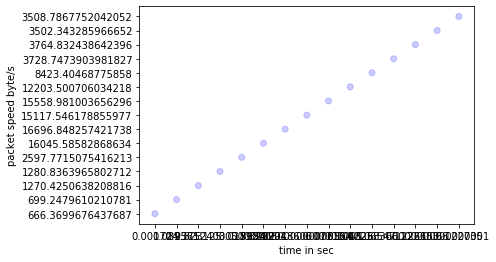

In [512]:
activation_analyser.generate_speed()
activation_analyser.get_plot(False, True)

In [693]:
activation_analyser.dataframe

,time,source,destination,protocol,length,Info
0,0.000000,192.168.10.213,52.114.128.43,TLSv1.2,490,Application Data
1,0.042853,52.114.128.43,192.168.10.213,TLSv1.2,120,Application Data
2,0.045540,192.168.10.213,52.114.128.43,TLSv1.2,926,Application Data
3,0.089022,52.114.128.43,192.168.10.213,TLSv1.2,493,Application Data
4,0.125335,192.168.10.213,52.114.128.43,TCP,66,45558 https(443) [ACK] Seq=1285 Ack=482 Win=66...
...,...,...,...,...,...,...
180,17.255943,192.168.10.213,52.114.128.43,TCP,66,45558 https(443) [ACK] Seq=16620 Ack=4330 Win=...
181,18.376821,192.168.10.213,a-0001.a-msedge.net,TLSv1.2,89,Application Data
182,18.388127,a-0001.a-msedge.net,192.168.10.213,TCP,54,https(443) 60142 [ACK] Seq=17042 Ack=24174 Win...
183,18.388245,a-0001.a-msedge.net,192.168.10.213,TLSv1.2,85,Application Data


In [106]:
median_among_activatiosn = generate_medians_paths(activations_csv_paths)

['Local' 'microsoft.com' 'Local' 'microsoft.com' 'Local' 'Local'
 'microsoft.com' 'Local' 'Local' 'microsoft.com' 'Local' 'Local'
 'microsoft.com' 'microsoft.com' 'microsoft.com' 'microsoft.com'
 'microsoft.com' 'Local' 'Local' 'Local' 'Local' 'Local' 'microsoft.com'
 'microsoft.com' 'Local' 'Local' 'microsoft.com' 'microsoft.com' 'Local'
 'Local' 'microsoft.com' 'microsoft.com' 'microsoft.com' 'Local' 'Local'
 'Local' 'microsoft.com' 'microsoft.com' 'Local' 'Local' 'Local'
 'microsoft.com' 'microsoft.com' 'Local' 'microsoft.com' 'Local'
 'microsoft.com' 'Local' 'microsoft.com' 'Local' 'microsoft.com'
 'microsoft.com' 'Local' 'microsoft.com' 'Local' 'microsoft.com' 'Local'
 'Local' 'Local' 'microsoft.com' 'microsoft.com' 'Local' 'Local'
 'microsoft.com' 'microsoft.com' 'microsoft.com' 'Local' 'Local'
 'microsoft.com' 'Local' 'microsoft.com' 'Local' 'microsoft.com' 'Local'
 'Local' 'microsoft.com' 'Local' 'microsoft.com' 'Local' 'microsoft.com'
 'Local' 'microsoft.com' 'microsoft.com' '

['Local' 'microsoft.com' 'Local' 'Local' 'microsoft.com' 'microsoft.com'
 'microsoft.com' 'microsoft.com' 'microsoft.com' 'Local' 'Local' 'Local'
 'Local' 'Local' 'microsoft.com' 'microsoft.com' 'Local' 'Local'
 'microsoft.com' 'microsoft.com' 'Local' 'Local' 'microsoft.com'
 'microsoft.com' 'Local' 'Local' 'Local' 'microsoft.com' 'microsoft.com'
 'microsoft.com' 'microsoft.com' 'microsoft.com' 'Local' 'Local' 'Local'
 'microsoft.com' 'microsoft.com' 'Local' 'microsoft.com' 'Local'
 'microsoft.com' 'Local' 'microsoft.com' 'microsoft.com' 'Local'
 'microsoft.com' 'Local' 'microsoft.com' 'microsoft.com' 'Local' 'Local'
 'microsoft.com' 'Local' 'microsoft.com' 'Local' 'microsoft.com'
 'microsoft.com' 'microsoft.com' 'Local' 'Local' 'Local' 'microsoft.com'
 'microsoft.com' 'Local' 'microsoft.com' 'Local' 'Local' 'microsoft.com'
 'microsoft.com' 'Local' 'Local' 'microsoft.com' 'microsoft.com' 'Local'
 'Local' 'microsoft.com' 'Local' 'Local' 'microsoft.com' 'microsoft.com'
 'Local' 'Local' '

['Local' 'Local' 'microsoft.com' 'microsoft.com' 'microsoft.com' 'Local'
 'Local' 'Local' 'Local' 'Local' 'Local' 'microsoft.com' 'microsoft.com'
 'microsoft.com' 'microsoft.com' 'Local' 'Local' 'Local' 'Local'
 'microsoft.com' 'microsoft.com' 'Local' 'microsoft.com' 'microsoft.com'
 'Local' 'microsoft.com' 'Local' 'microsoft.com' 'Local' 'microsoft.com'
 'Local' 'microsoft.com' 'microsoft.com' 'Local' 'Local' 'microsoft.com'
 'Local' 'microsoft.com' 'Local' 'microsoft.com' 'Local' 'microsoft.com'
 'microsoft.com' 'microsoft.com' 'Local' 'Local' 'microsoft.com' 'Local'
 'microsoft.com' 'Local' 'Local' 'microsoft.com' 'microsoft.com' 'Local'
 'Local' 'microsoft.com' 'microsoft.com' 'Local' 'Local' 'Local'
 'microsoft.com' 'microsoft.com' 'microsoft.com' 'Local' 'Local' 'Local'
 'Local' 'microsoft.com' 'microsoft.com' 'Local' 'microsoft.com' 'Local'
 'microsoft.com' 'Local' 'Local' 'Local' 'microsoft.com' 'microsoft.com'
 'Local' 'Local' 'microsoft.com' 'microsoft.com' 'microsoft.com'
 '

['Local' 'microsoft.com' 'Local' 'Local' 'microsoft.com' 'microsoft.com'
 'microsoft.com' 'microsoft.com' 'microsoft.com' 'Local' 'Local' 'Local'
 'Local' 'Local' 'microsoft.com' 'microsoft.com' 'Local' 'Local'
 'microsoft.com' 'microsoft.com' 'microsoft.com' 'Local' 'microsoft.com'
 'microsoft.com' 'Local' 'microsoft.com' 'Local' 'Local' 'Local'
 'microsoft.com' 'microsoft.com' 'microsoft.com' 'microsoft.com' 'Local'
 'Local' 'Local' 'microsoft.com' 'microsoft.com' 'Local' 'microsoft.com'
 'Local' 'microsoft.com' 'microsoft.com' 'Local' 'Local' 'microsoft.com'
 'microsoft.com' 'Local' 'microsoft.com' 'Local' 'microsoft.com'
 'microsoft.com' 'Local' 'Local' 'microsoft.com' 'Local' 'microsoft.com'
 'Local' 'microsoft.com' 'microsoft.com' 'microsoft.com' 'Local' 'Local'
 'microsoft.com' 'Local' 'Local' 'microsoft.com' 'microsoft.com' 'Local'
 'microsoft.com' 'Local' 'Local' 'microsoft.com' 'microsoft.com' 'Local'
 'Local' 'Local' 'microsoft.com' 'microsoft.com' 'microsoft.com' 'Local'
 '

['Local' 'microsoft.com' 'Local' 'Local' 'microsoft.com' 'microsoft.com'
 'microsoft.com' 'microsoft.com' 'microsoft.com' 'Local' 'Local' 'Local'
 'Local' 'Local' 'microsoft.com' 'microsoft.com' 'Local' 'Local'
 'microsoft.com' 'microsoft.com' 'microsoft.com' 'Local' 'microsoft.com'
 'microsoft.com' 'Local' 'Local' 'Local' 'Local' 'microsoft.com'
 'microsoft.com' 'microsoft.com' 'microsoft.com' 'Local' 'Local' 'Local'
 'microsoft.com' 'microsoft.com' 'Local' 'microsoft.com' 'Local'
 'microsoft.com' 'Local' 'microsoft.com' 'Local' 'microsoft.com'
 'microsoft.com' 'Local' 'microsoft.com' 'microsoft.com' 'Local' 'Local'
 'microsoft.com' 'Local' 'microsoft.com' 'Local' 'microsoft.com'
 'microsoft.com' 'microsoft.com' 'Local' 'Local' 'microsoft.com' 'Local'
 'Local' 'microsoft.com' 'microsoft.com' 'Local' 'microsoft.com' 'Local'
 'Local' 'microsoft.com' 'Local' 'microsoft.com' 'microsoft.com' 'Local'
 'Local' 'microsoft.com' 'Local' 'microsoft.com' 'microsoft.com' 'Local'
 'Local' 'Local' '

['Local' 'microsoft.com' 'Local' 'Local' 'microsoft.com' 'Local' 'Local'
 'microsoft.com' 'Local' 'Local' 'microsoft.com' 'microsoft.com' 'Local'
 'Local' 'microsoft.com' 'Local' 'Local' 'Local' 'microsoft.com' 'Local'
 'microsoft.com' 'microsoft.com' 'Local' 'Local' 'Local' 'microsoft.com'
 'microsoft.com' 'Local' 'microsoft.com' 'Local' 'microsoft.com' 'Local'
 'microsoft.com' 'Local' 'microsoft.com' 'Local' 'microsoft.com'
 'microsoft.com' 'Local' 'Local' 'Local' 'microsoft.com' 'Local'
 'microsoft.com' 'Local' 'microsoft.com' 'Local' 'microsoft.com'
 'microsoft.com' 'microsoft.com' 'Local' 'Local' 'microsoft.com' 'Local'
 'Local' 'microsoft.com' 'microsoft.com' 'Local' 'microsoft.com' 'Local'
 'Local' 'microsoft.com' 'microsoft.com' 'Local' 'Local' 'Local'
 'microsoft.com' 'microsoft.com' 'microsoft.com' 'Local' 'Local' 'Local'
 'Local' 'microsoft.com' 'Local' 'microsoft.com' 'Local' 'microsoft.com'
 'Local' 'Local' 'microsoft.com' 'Local' 'microsoft.com' 'Local'
 'microsoft.com' '

['Local' 'microsoft.com' 'microsoft.com' 'Local' 'Local' 'level3.com'
 'Local' 'microsoft.com' 'Local' 'Local' 'microsoft.com' 'microsoft.com'
 'microsoft.com' 'Local' 'Local' 'Local' 'Local' 'microsoft.com' 'Local'
 'microsoft.com' 'microsoft.com' 'microsoft.com' 'microsoft.com'
 'microsoft.com' 'microsoft.com' 'microsoft.com' 'microsoft.com'
 'microsoft.com' 'microsoft.com' 'microsoft.com' 'Local' 'Local' 'Local'
 'Local' 'Local' 'Local' 'Local' 'level3.com' 'Local' 'microsoft.com'
 'Local' 'Local' 'microsoft.com' 'microsoft.com' 'microsoft.com' 'Local'
 'Local' 'Local' 'Local' 'microsoft.com' 'Local' 'microsoft.com'
 'microsoft.com' 'Local' 'microsoft.com' 'Local' 'microsoft.com' 'Local'
 'Local' 'microsoft.com' 'Local' 'Local' 'microsoft.com' 'Local'
 'microsoft.com' 'microsoft.com' 'Local' 'Local' 'microsoft.com' 'Local'
 'Local' 'microsoft.com' 'microsoft.com' 'Local' 'microsoft.com'
 'microsoft.com' 'Local' 'microsoft.com' 'Local' 'Local' 'microsoft.com'
 'Local' 'microsoft.com'

['Local' 'Local' 'Local' 'microsoft.com' 'Local' 'microsoft.com' 'Local'
 'microsoft.com' 'microsoft.com' 'Local' 'Local' 'microsoft.com' 'Local'
 'Local' 'microsoft.com' 'microsoft.com' 'Local' 'Local' 'microsoft.com'
 'Local' 'Local' 'Local' 'microsoft.com' 'Local' 'microsoft.com'
 'microsoft.com' 'Local' 'Local' 'Local' 'microsoft.com' 'microsoft.com'
 'Local' 'microsoft.com' 'Local' 'microsoft.com' 'Local' 'microsoft.com'
 'Local' 'microsoft.com' 'Local' 'microsoft.com' 'Local' 'Local'
 'microsoft.com' 'Local' 'microsoft.com' 'microsoft.com' 'Local' 'Local'
 'microsoft.com' 'Local' 'microsoft.com' 'microsoft.com' 'Local' 'Local'
 'microsoft.com' 'Local' 'microsoft.com' 'Local' 'microsoft.com' 'Local'
 'microsoft.com' 'microsoft.com' 'microsoft.com' 'Local' 'microsoft.com'
 'Local' 'Local' 'microsoft.com' 'microsoft.com' 'Local' 'microsoft.com'
 'Local' 'Local' 'microsoft.com' 'microsoft.com' 'Local' 'Local' 'Local'
 'microsoft.com' 'microsoft.com' 'microsoft.com' 'Local' 'microsoft

['Local' 'Local' 'Local' 'Local' 'Local' 'microsoft.com' 'Local' 'Local'
 'microsoft.com' 'microsoft.com' 'microsoft.com' 'microsoft.com'
 'microsoft.com' 'Local' 'Local' 'Local' 'Local' 'Local' 'microsoft.com'
 'microsoft.com' 'Local' 'Local' 'microsoft.com' 'microsoft.com' 'Local'
 'Local' 'Local' 'microsoft.com' 'microsoft.com' 'Local' 'Local'
 'microsoft.com' 'microsoft.com' 'microsoft.com' 'Local' 'Local' 'Local'
 'microsoft.com' 'microsoft.com' 'microsoft.com' 'Local' 'Local' 'Local'
 'microsoft.com' 'microsoft.com' 'Local' 'microsoft.com' 'Local' 'Local'
 'microsoft.com' 'Local' 'microsoft.com' 'Local' 'Local' 'microsoft.com'
 'microsoft.com' 'Local' 'microsoft.com' 'Local' 'Local' 'microsoft.com'
 'Local' 'microsoft.com' 'Local' 'microsoft.com' 'Local' 'microsoft.com'
 'microsoft.com' 'Local' 'microsoft.com' 'Local' 'microsoft.com' 'Local'
 'Local' 'Local' 'Local' 'microsoft.com' 'microsoft.com' 'microsoft.com'
 'Local' 'Local' 'microsoft.com' 'microsoft.com' 'Local' 'Local'
 '

['Local' 'microsoft.com' 'Local' 'Local' 'microsoft.com' 'microsoft.com'
 'microsoft.com' 'microsoft.com' 'microsoft.com' 'Local' 'Local' 'Local'
 'Local' 'Local' 'microsoft.com' 'microsoft.com' 'Local' 'Local'
 'microsoft.com' 'microsoft.com' 'microsoft.com' 'Local' 'Local' 'Local'
 'microsoft.com' 'microsoft.com' 'Local' 'Local' 'microsoft.com'
 'microsoft.com' 'Local' 'Local' 'microsoft.com' 'microsoft.com' 'Local'
 'Local' 'microsoft.com' 'microsoft.com' 'Local' 'microsoft.com'
 'microsoft.com' 'microsoft.com' 'Local' 'Local' 'Local' 'microsoft.com'
 'microsoft.com' 'Local' 'Local' 'Local' 'Local' 'microsoft.com'
 'microsoft.com' 'microsoft.com' 'Local' 'Local' 'Local' 'microsoft.com'
 'Local' 'Local' 'Local' 'microsoft.com' 'microsoft.com' 'microsoft.com'
 'Local' 'Local' 'Local' 'microsoft.com' 'microsoft.com' 'microsoft.com'
 'microsoft.com' 'microsoft.com' 'Local' 'Local' 'Local' 'microsoft.com'
 'Local' 'microsoft.com' 'microsoft.com' 'Local' 'microsoft.com'
 'microsoft.com' '

['Local' 'microsoft.com' 'Local' 'Local' 'Local' 'microsoft.com' 'Local'
 'Local' 'microsoft.com' 'Local' 'Local' 'Local' 'microsoft.com' 'Local'
 'Local' 'microsoft.com' 'microsoft.com' 'microsoft.com' 'microsoft.com'
 'Local' 'Local' 'Local' 'microsoft.com' 'Local' 'Local' 'microsoft.com'
 'microsoft.com' 'Local' 'Local' 'microsoft.com' 'microsoft.com'
 'microsoft.com' 'Local' 'Local' 'Local' 'microsoft.com' 'microsoft.com'
 'Local' 'Local' 'microsoft.com' 'microsoft.com' 'Local' 'Local'
 'microsoft.com' 'microsoft.com' 'Local' 'microsoft.com' 'microsoft.com'
 'Local' 'Local' 'microsoft.com' 'Local' 'microsoft.com' 'microsoft.com'
 'Local' 'Local' 'microsoft.com' 'microsoft.com' 'microsoft.com' 'Local'
 'Local' 'Local' 'microsoft.com' 'Local' 'Local' 'Local' 'Local'
 'microsoft.com' 'microsoft.com' 'Local' 'Local' 'Local' 'microsoft.com'
 'microsoft.com' 'microsoft.com' 'microsoft.com' 'Local' 'Local' 'Local'
 'microsoft.com' 'Local' 'microsoft.com' 'microsoft.com' 'microsoft.com'
 '

['Local' 'Local' 'Local' 'Local' 'microsoft.com' 'microsoft.com'
 'microsoft.com' 'microsoft.com' 'microsoft.com' 'Local' 'Local' 'Local'
 'Local' 'Local' 'microsoft.com' 'microsoft.com' 'microsoft.com' 'Local'
 'Local' 'Local' 'microsoft.com' 'microsoft.com' 'microsoft.com' 'Local'
 'Local' 'Local' 'microsoft.com' 'microsoft.com' 'microsoft.com'
 'microsoft.com' 'Local' 'Local' 'microsoft.com' 'microsoft.com' 'Local'
 'microsoft.com' 'Local' 'Local' 'microsoft.com' 'microsoft.com' 'Local'
 'microsoft.com' 'microsoft.com' 'Local' 'microsoft.com' 'microsoft.com'
 'Local' 'Local' 'microsoft.com' 'Local' 'microsoft.com' 'Local'
 'microsoft.com' 'Local' 'microsoft.com' 'Local' 'Local' 'Local' 'Local'
 'microsoft.com' 'microsoft.com' 'Local' 'Local' 'Local' 'microsoft.com'
 'microsoft.com' 'microsoft.com' 'Local' 'Local' 'Local' 'microsoft.com'
 'microsoft.com' 'microsoft.com' 'microsoft.com' 'Local' 'Local' 'Local'
 'microsoft.com' 'Local' 'microsoft.com' 'microsoft.com' 'microsoft.com'
 '

['Local' 'microsoft.com' 'Local' 'microsoft.com' 'Local' 'microsoft.com'
 'Local' 'Local' 'Local' 'Local' 'Local' 'Other' 'level3.com' 'Other'
 'Local' 'level3.com' 'Local' 'Local' 'microsoft.com' 'Local' 'Local'
 'microsoft.com' 'microsoft.com' 'microsoft.com' 'microsoft.com'
 'microsoft.com' 'Local' 'Local' 'Local' 'Local' 'Local' 'microsoft.com'
 'microsoft.com' 'Local' 'Local' 'microsoft.com' 'microsoft.com'
 'microsoft.com' 'Local' 'Local' 'Local' 'microsoft.com' 'microsoft.com'
 'Local' 'Local' 'microsoft.com' 'microsoft.com' 'Local' 'Local'
 'microsoft.com' 'microsoft.com' 'Local' 'Local' 'microsoft.com'
 'microsoft.com' 'Local' 'microsoft.com' 'microsoft.com' 'Local' 'Local'
 'microsoft.com' 'Local' 'microsoft.com' 'microsoft.com' 'Local'
 'microsoft.com' 'Local' 'Local' 'Local' 'microsoft.com' 'microsoft.com'
 'microsoft.com' 'Local' 'microsoft.com' 'microsoft.com' 'Local' 'Local'
 'microsoft.com' 'Local' 'microsoft.com' 'microsoft.com' 'Local'
 'microsoft.com' 'microsoft.com'

['Local' 'Other' 'Local' 'Local' 'Local' 'Local' 'microsoft.com'
 'microsoft.com' 'microsoft.com' 'microsoft.com' 'microsoft.com' 'Local'
 'Local' 'Local' 'Local' 'Local' 'microsoft.com' 'microsoft.com'
 'microsoft.com' 'Local' 'Local' 'Local' 'microsoft.com' 'microsoft.com'
 'Local' 'Local' 'Local' 'microsoft.com' 'Local' 'microsoft.com'
 'microsoft.com' 'Local' 'Local' 'Local' 'microsoft.com' 'microsoft.com'
 'microsoft.com' 'Local' 'Local' 'microsoft.com' 'microsoft.com' 'Local'
 'microsoft.com' 'microsoft.com' 'Local' 'Local' 'microsoft.com'
 'microsoft.com' 'Local' 'Local' 'microsoft.com' 'microsoft.com' 'Local'
 'microsoft.com' 'Local' 'Local' 'Local' 'Local' 'microsoft.com' 'Local'
 'microsoft.com' 'microsoft.com' 'microsoft.com' 'microsoft.com' 'Local'
 'Local' 'Local' 'Local' 'Local' 'microsoft.com' 'microsoft.com' 'Local'
 'microsoft.com' 'microsoft.com' 'microsoft.com' 'microsoft.com' 'Local'
 'Local' 'Local' 'microsoft.com' 'Local' 'microsoft.com' 'microsoft.com'
 'Local' '

['Local' 'microsoft.com' 'Local' 'Local' 'microsoft.com' 'microsoft.com'
 'Local' 'Local' 'microsoft.com' 'microsoft.com' 'Local' 'Local'
 'microsoft.com' 'microsoft.com' 'Local' 'Local' 'microsoft.com' 'Local'
 'Local' 'Local' 'Local' 'Local' 'microsoft.com' 'microsoft.com' 'Local'
 'Local' 'microsoft.com' 'microsoft.com' 'Local' 'Local' 'Local'
 'microsoft.com' 'microsoft.com' 'microsoft.com' 'microsoft.com' 'Local'
 'Local' 'Local' 'microsoft.com' 'microsoft.com' 'Local' 'Local' 'Local'
 'microsoft.com' 'microsoft.com' 'microsoft.com' 'Local' 'Local' 'Local'
 'Local' 'microsoft.com' 'microsoft.com' 'microsoft.com' 'Local' 'Local'
 'microsoft.com' 'microsoft.com' 'Local' 'microsoft.com' 'microsoft.com'
 'microsoft.com' 'microsoft.com' 'Local' 'microsoft.com' 'Local'
 'microsoft.com' 'Local' 'microsoft.com' 'Local' 'Local' 'Local' 'Local'
 'microsoft.com' 'Local' 'microsoft.com' 'Local' 'Local' 'Local'
 'microsoft.com' 'microsoft.com' 'Local' 'microsoft.com' 'Local'
 'microsoft.com' '

['Local' 'microsoft.com' 'microsoft.com' 'Local' 'microsoft.com' 'Local'
 'microsoft.com' 'Local' 'Local' 'microsoft.com' 'microsoft.com'
 'microsoft.com' 'microsoft.com' 'microsoft.com' 'Local' 'Local' 'Local'
 'Local' 'Local' 'microsoft.com' 'Local' 'microsoft.com' 'microsoft.com'
 'Local' 'Local' 'Local' 'microsoft.com' 'microsoft.com' 'Local' 'Local'
 'Local' 'Local' 'microsoft.com' 'microsoft.com' 'microsoft.com'
 'microsoft.com' 'microsoft.com' 'Local' 'Local' 'Local' 'Local' 'Local'
 'Local' 'Local' 'microsoft.com' 'microsoft.com' 'microsoft.com'
 'microsoft.com' 'Local' 'Local' 'Local' 'microsoft.com' 'Local' 'Local'
 'microsoft.com' 'microsoft.com' 'microsoft.com' 'Local' 'Local' 'Local'
 'microsoft.com' 'microsoft.com' 'microsoft.com' 'Local' 'Local' 'Local'
 'microsoft.com' 'microsoft.com' 'microsoft.com' 'Local' 'Local'
 'microsoft.com' 'microsoft.com' 'Local' 'Local' 'Local' 'Local'
 'microsoft.com' 'Local' 'microsoft.com' 'microsoft.com' 'Local' 'Local'
 'microsoft.com' '

['Local' 'Local' 'Local' 'Local' 'Local' 'Local' 'microsoft.com'
 'microsoft.com' 'microsoft.com' 'microsoft.com' 'Local' 'Local' 'Local'
 'Local' 'Local' 'microsoft.com' 'microsoft.com' 'microsoft.com'
 'microsoft.com' 'Local' 'Local' 'Local' 'Local' 'microsoft.com' 'Local'
 'microsoft.com' 'microsoft.com' 'Local' 'Local' 'microsoft.com' 'Local'
 'Local' 'microsoft.com' 'microsoft.com' 'microsoft.com' 'Local' 'Local'
 'microsoft.com' 'microsoft.com' 'microsoft.com' 'Local' 'Local'
 'microsoft.com' 'microsoft.com' 'Local' 'microsoft.com' 'Local'
 'microsoft.com' 'Local' 'Local' 'Local' 'Local' 'microsoft.com'
 'microsoft.com' 'microsoft.com' 'microsoft.com' 'Local' 'Local'
 'microsoft.com' 'microsoft.com' 'microsoft.com' 'Local' 'microsoft.com'
 'microsoft.com' 'Local' 'Local' 'Local' 'microsoft.com' 'microsoft.com'
 'Local' 'Local' 'microsoft.com' 'microsoft.com' 'Local' 'microsoft.com'
 'microsoft.com' 'microsoft.com' 'microsoft.com' 'Local' 'Local' 'Local'
 'microsoft.com' 'Local' '

In [111]:
medians_speeds_activations = []
for median in median_among_activatiosn:
    for m in median:
        medians_speeds_activations.append(m)

In [112]:
medians_speeds_activations = np.asarray(medians_speeds_activations)

Text(0, 0.5, 'ECDF')

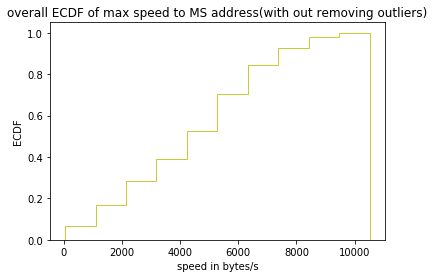

In [113]:
temp = medians_speeds_activations[medians_speeds_activations < np.percentile(medians_speeds_activations , 99)]
plt.hist(temp, density=True, cumulative=True, label='CDF',
         histtype='step', alpha=0.8, color='y')
plt.title("overall ECDF of max speed to MS address(with out removing outliers)")
plt.xlabel("speed in bytes/s")
plt.ylabel("ECDF")

In [114]:
min(medians_speeds_activations)

54.0

In [115]:
all_medians_idles = []
for ls in medians_among_idles:
    for v in ls:
        all_medians_idles.append(v)

In [116]:
np.percentile(all_medians_idles, 99)
#95% speeds from median is lower than 1950

8864.254166666666

In [117]:
np.percentile(medians_speeds_activations, 10)
#37% speeds of activations is lower than 1960.
#mean (total data/total time) of bac

1502.5

In [126]:
filtered_medians_idle = np.asanyarray(all_medians_idles)
filtered_medians_idle = filtered_medians_idle

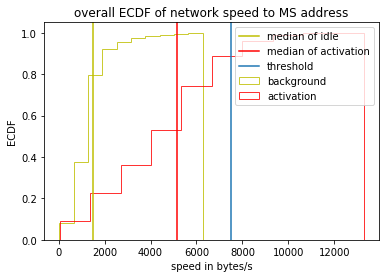

In [586]:
temp = filtered_medians_idle[filtered_medians_idle < np.percentile(filtered_medians_idle, 98)]
temp2 = medians_speeds_activations[medians_speeds_activations < np.percentile(medians_speeds_activations, 100)]
plt.hist(temp, density=True, cumulative=True, label='background',
         histtype='step', alpha=0.8, color='y')
plt.hist(temp2, density=True, cumulative=True, label='activation',
         histtype='step', alpha=0.8, color='r')

plt.title("overall ECDF of network speed to MS address")
plt.xlabel("speed in bytes/s")
plt.ylabel("ECDF")
plt.axvline(1484, label='median of idle', c = 'y')
plt.axvline(5150, label='median of activation', c = 'r')
plt.axvline(7500, label='threshold')
plt.legend()

In [567]:
np.percentile(filtered_medians_idle, 75)

1833.75

In [580]:
np.percentile(medians_speeds_activations, 75)

6696.267857142857

(array([1152., 1761., 1763., 2236., 2740., 1761.,  920.,  340.,   85.,
          26.]),
 array([   54. ,  1389.6,  2725.2,  4060.8,  5396.4,  6732. ,  8067.6,
         9403.2, 10738.8, 12074.4, 13410. ]),
 <a list of 10 Patch objects>)

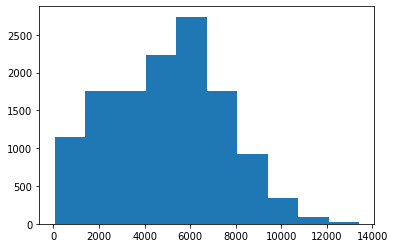

In [581]:
plt.hist(medians_speeds_activations)

In [573]:
np.percentile(filtered_medians_idle, 98)

6276.537500000002

In [584]:
np.percentile(medians_speeds_activations[medians_speeds_activations > 6276], 50)

7487.6

In [574]:
(6612 + 6276)/2

6444.0

In [124]:
np.percentile(medians_speeds_activations, 50)
#more than 80% of speeds 

5150.1875

In [ ]:
# There are mean(X [sum up], .. , X + 19) -> sum(X, .. X+ 19)/20 -> speed of X
# median of [X_1, X_2, X_3...] for each one pcap.


# k pcaps file in background
# 20 seconds window
# k medians -> 1 median 

In [ ]:
#plan:
#parse the result
#analyze the result
#from ourvalue to validate.

In [82]:
for p in csv_paths:
    if 'Livin' in p and 'invoke' in p:
        print(p)
        invoke_csv_path = p

/Users/kuangwenyi/Documents/Development/master-research/activations-final1a/[S9.Ep21] The Office (U.S.) - Livin' the Dream/invoke_nodup.csv


In [980]:
ground_res_df = pd.read_csv(invoke_csv_path)
bandwidth_calculator = bandwithCaculator(ground_res_df)
bandwidth_calculator.generate_destination_owner_column()
bandwidth_calculator.generate_source_owner_column()
filtered_ground_res_df = bandwidth_calculator.filter_out_pure_local()

['Local' 'microsoft.com' 'Local' ... 'Local' 'microsoft.com' 'Local']


In [981]:
sum(filtered_ground_res_df[ (filtered_ground_res_df.time < 2271) & (filtered_ground_res_df.time > 2270 )].length)

6938

In [983]:
sum(filtered_ground_res_df[ (filtered_ground_res_df.time < 2270) & (filtered_ground_res_df.time > 2269 )].length)

27092

In [1029]:
filtered_ground_speeds = get_median_bandwidth(filtered_ground_res_df)

In [1030]:
len(filtered_ground_speeds)

3266

In [1031]:
len(filtered_ground_res_df)

3266

In [1032]:
filtered_ground_res_df['speed'] = filtered_ground_speeds

In [1048]:
filtered_ground_res_df[(filtered_ground_res_df.time > 2269) & (filtered_ground_res_df.time < 2271)]

,time,source,destination,protocol,length,Info,destination_owner,source_owner,speed
2933,2269.463012,d8:f7:10:c3:34:e4-0.local,dual-a-0001.a-msedge.net,TCP,74,58890 https(443) [SYN] Seq=0 Win=14600 Len=0 M...,microsoft.com,Local,10085.75
2934,2269.475054,dual-a-0001.a-msedge.net,d8:f7:10:c3:34:e4-0.local,TCP,66,https(443) 58890 [SYN ACK] Seq=0 Ack=1 Win=655...,Local,microsoft.com,10067.25
2935,2269.475731,d8:f7:10:c3:34:e4-0.local,dual-a-0001.a-msedge.net,TCP,54,58890 https(443) [ACK] Seq=1 Ack=1 Win=14656 L...,microsoft.com,Local,10050.75
2936,2269.484150,d8:f7:10:c3:34:e4-0.local,dual-a-0001.a-msedge.net,TLSv1,361,Client Hello,microsoft.com,Local,10037.25
2937,2269.496186,dual-a-0001.a-msedge.net,d8:f7:10:c3:34:e4-0.local,TCP,54,https(443) 58890 [ACK] Seq=1 Ack=308 Win=26240...,Local,microsoft.com,9947.00
...,...,...,...,...,...,...,...,...,...
3032,2270.448047,d8:f7:10:c3:34:e4-0.local,dual-a-0001.a-msedge.net,TLSv1.2,793,Application Data,microsoft.com,Local,1833.25
3033,2270.448840,dual-a-0001.a-msedge.net,d8:f7:10:c3:34:e4-0.local,TCP,54,https(443) 58890 [ACK] Seq=7367 Ack=20116 Win=...,Local,microsoft.com,1635.00
3034,2270.448962,dual-a-0001.a-msedge.net,d8:f7:10:c3:34:e4-0.local,TCP,60,[TCP Dup ACK 3304#1] https(443) 58890 [ACK] Se...,Local,microsoft.com,1621.50
3035,2270.459473,dual-a-0001.a-msedge.net,d8:f7:10:c3:34:e4-0.local,TCP,54,https(443) 58890 [ACK] Seq=7367 Ack=20855 Win=...,Local,microsoft.com,1606.50


In [1050]:
filtered_ground_res_df[(filtered_ground_res_df.speed >= 8864.26)]

,time,source,destination,protocol,length,Info,destination_owner,source_owner,speed
650,520.132176,d8:f7:10:c3:34:e4-0.local,trouter-cus-b.cloudapp.net,TCP,74,[TCP Retransmission] 38312 https(443) [SYN] Se...,microsoft.com,Local,9727.25
651,520.167938,trouter-cus-b.cloudapp.net,d8:f7:10:c3:34:e4-0.local,TCP,74,https(443) 38312 [SYN ACK] Seq=0 Ack=1 Win=819...,Local,microsoft.com,9708.75
652,520.168808,d8:f7:10:c3:34:e4-0.local,trouter-cus-b.cloudapp.net,TCP,66,38312 https(443) [ACK] Seq=1 Ack=1 Win=14656 L...,microsoft.com,Local,9690.25
653,520.169430,d8:f7:10:c3:34:e4-0.local,trouter-cus-b.cloudapp.net,TLSv1,279,Client Hello,microsoft.com,Local,9673.75
654,520.207864,trouter-cus-b.cloudapp.net,d8:f7:10:c3:34:e4-0.local,TLSv1.2,4306,Server Hello Certificate Server Key Exchange S...,Local,microsoft.com,9604.00
2926,2262.202707,52.114.158.91,d8:f7:10:c3:34:e4-0.local,TLSv1.2,120,Application Data,Local,microsoft.com,10461.75
2927,2262.203748,d8:f7:10:c3:34:e4-0.local,52.114.158.91,TLSv1.2,852,Application Data,microsoft.com,Local,10431.75
2928,2262.282436,52.114.158.91,d8:f7:10:c3:34:e4-0.local,TLSv1.2,492,Application Data,Local,microsoft.com,10218.75
2929,2262.316654,d8:f7:10:c3:34:e4-0.local,52.114.158.91,TCP,66,54952 https(443) [ACK] Seq=574618 Ack=220554 W...,microsoft.com,Local,10095.75
2930,2263.117698,d8:f7:10:c3:34:e4-0.local,trouter-cus-b.cloudapp.net,TLSv1.2,123,Application Data,microsoft.com,Local,10079.25


(array([ 452., 2023.,  316.,  201.,   93.,   75.,   33.,   33.,   21.,
          19.]),
 array([   54.   ,  1094.775,  2135.55 ,  3176.325,  4217.1  ,  5257.875,
         6298.65 ,  7339.425,  8380.2  ,  9420.975, 10461.75 ]),
 <a list of 10 Patch objects>)

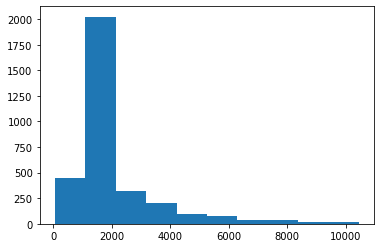

In [1076]:
plt.hist(filtered_ground_res_df.speed)

In [83]:
network_results_path  = "/Users/kuangwenyi/Documents/Development/master-research/activations-final1a/results-final1a/results-traffic-final1a-filtered.txt"

In [147]:
file_name_activated_time = {}
with open(network_results_path) as f:
    last_l = ""
    for idx, l in enumerate(f):
        if "invoke" in l:
            activated_time = eval(l.split(':')[1])
            file_name_activated_time[last_l.split("/")[5]] = activated_time
        last_l = l

In [85]:
ground_csv_paths = []
for l in seprate_paths['invoke_nodup']:
    if l.split('/')[7] in file_name_activated_time:
        ground_csv_paths.append(l)

In [86]:
def generate_speeds_conlumns(path):
    df = pd.read_csv(path)
    bandwidth_calculate = bandwithCaculator(df)
    bandwidth_calculate.generate_destination_owner_column()
    bandwidth_calculate.generate_source_owner_column()
    filtred_df = bandwidth_calculate.filter_out_pure_local()
    filtred_df['speed'] = get_median_bandwidth(filtred_df)
    return filtred_df

In [87]:
ground_df_speeds = {}
for path in ground_csv_paths:
    ground_df_speeds[path] = generate_speeds_conlumns(path)

['Local' 'Local' 'microsoft.com' ... 'Local' 'microsoft.com' 'Local']
['Local' 'Local' 'microsoft.com' ... 'microsoft.com' 'Local' 'Local']
['Local' 'microsoft.com' 'Local' ... 'Local' 'microsoft.com' 'Local']
['Local' 'microsoft.com' 'Local' ... 'Local' 'microsoft.com' 'Local']
['Local' 'microsoft.com' 'Local' ... 'microsoft.com' 'microsoft.com'
 'Local']
['Local' 'microsoft.com' 'Local' ... 'Local' 'microsoft.com' 'Local']
['Local' 'microsoft.com' 'Local' ... 'Local' 'microsoft.com' 'Local']
['Local' 'microsoft.com' 'Local' ... 'Local' 'microsoft.com' 'Local']
['Local' 'Local' 'microsoft.com' ... 'Local' 'microsoft.com' 'Local']
['Local' 'Local' 'Local' ... 'Local' 'microsoft.com' 'Local']
['microsoft.com' 'Local' 'microsoft.com' ... 'Local' 'microsoft.com'
 'Local']
['Local' 'Local' 'microsoft.com' ... 'Local' 'microsoft.com' 'Local']
['Local' 'Local' 'microsoft.com' ... 'Local' 'microsoft.com' 'Local']


In [173]:
key_name_df = {}
for key in ground_df_speeds.keys():
    for key_name in file_name_activated_time.keys():
        if key_name in key:
            key_name_df[key_name] = ground_df_speeds[key]

[V1.Ep5] Dear White People - Chapter V
[S7.Ep18] The West Wing - Requiem
[S9.Ep21] The Office (U.S.) - Livin' the Dream
[V1.Ep9] Dear White People - Chapter IX
[S7.Ep15] Gilmore Girls - I'm a Kayak, Hear Me Roar
[S6.Ep3] The L Word - LMFAO
[S3.Ep2] Narcos - The Cali KGB
[S7.Ep19] The West Wing - Transition
[S3.Ep10] Narcos - Going Back to Cali
[S7.Ep13] The West Wing - The Cold
[S7.Ep21] The West Wing - Institutional Memory
[S3.Ep18] Riverdale - Chapter Fifty-Three - 'Jawbreaker'
[S12.Ep1] The Big Bang Theory - The Conjugal Configuration


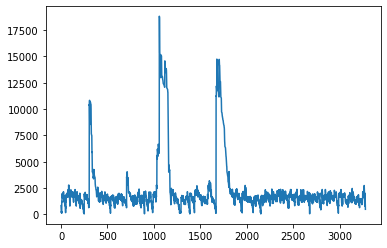

In [137]:
name_of_eposide = '[S7.Ep13] The West Wing - The Cold'
df = key_name_df[name_of_eposide]
# df[(df.time > 1352) & (df.time < 1353)]
plt.plot(df.speed)

In [99]:
file_name_activated_time['[S7.Ep13] The West Wing - The Cold']

(1352, 1352)

In [201]:
def get_activation_time(df, threshold):
    speeds = df.speed
    times = df.time
    
    
    res = []
    start_time = None
    for speed, timestamp in zip(speeds, times):
        if speed > threshold:
            start_time = timestamp
        if speed < threshold and start_time is not None:
            end_time = timestamp
            res.append((start_time, end_time))
            start_time = None
    
    combined_res = []
    temp = None
    for s,t in res:
        if not temp:
            temp = [s, t]
        else:
            if s > temp[1] + 3:
                combined_res.append(temp)
                temp = [s, t]
            else:
                temp[1] = t
    combined_res.append(temp)
    return combined_res

In [202]:
get_activation_time(df, 8864)

[[375.408566, 376.075845], [867.963596, 867.964642]]

In [250]:
file_name_computed_activated_time = {}
for key_name in key_name_df.keys():
    df = key_name_df.get(key_name)
#     print(file_name_activated_time.get(key_name))
    file_name_computed_activated_time[key_name] = get_activation_time(df, 5000)

In [251]:
def is_time_intuple(ground_tuple, estimate_tuple, error = 3):
    timing = np.mean(ground_tuple)
    if timing >= (estimate_tuple[0] - error) and timing <= (estimate_tuple[1] + error):
        return True
    return False

In [474]:
def compute_fp_fn(threshold):
    file_name_computed_activated_time = {}
    for key_name in key_name_df.keys():
        df = key_name_df.get(key_name)
    #     print(file_name_activated_time.get(key_name))
        file_name_computed_activated_time[key_name] = get_activation_time(df, threshold)
    
    total_hit = 0
    total_guess = 0
    total_ground = 0
    negative = 0
    
    for key_name in file_name_computed_activated_time.keys():
        postivite = 0

        total_ground += 1
        
        ground_tuple = file_name_activated_time.get(key_name)

        for estimate_tuple in file_name_computed_activated_time.get(key_name):
            total_guess += 1
            
            if estimate_tuple and is_time_intuple(ground_tuple, estimate_tuple):
                total_hit += 1
                postivite += 1

            
        if postivite == 0:
            negative += 1
    
#     false_postive = (total_guess - total_hit)/total_guess
#     false_negative = (negative)/total_ground
# #     print(negative)
#     true_postive = (total_hit)/total_guess
    precision = (total_hit)/(total_guess)
    sensitivity = (total_hit)/(total_hit + negative)
    f_one = (2 * total_hit)/(2 * total_hit + (total_guess - total_hit) + negative)
    return precision, sensitivity, f_one

Text(0.5, 1.0, 'model results based on network traffic detected results')

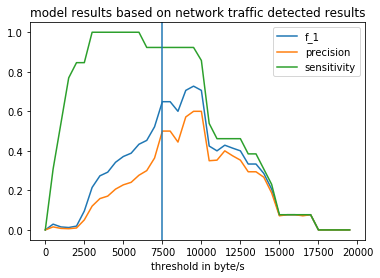

In [588]:
res = []
for threshold in range(0, 20000, 500):
    res.append((*compute_fp_fn(threshold), threshold))
res = np.asarray(res)
data = pd.DataFrame({
    'threshold' : res[:, 3],
    'sensitivity': res[:, 1],
    'precision': res[:, 0],
    'f_1': res[:, 2]
})
#plt.plot("threshold", 'true_positvie', data)
# plt.plot(res[:, 3], res[:, 0])
# plt.plot(res[:, 3], res[:, 2])
plt.plot('threshold', 'f_1', data=data)
plt.plot('threshold', 'precision', data=data)
plt.plot('threshold', 'sensitivity', data=data)
plt.legend()
plt.xlabel('threshold in byte/s')
plt.title('')
plt.axvline(7500)
plt.title('model results based on network traffic detected results')

Text(0.5, 1.0, 'model results based on network traffic detected results')

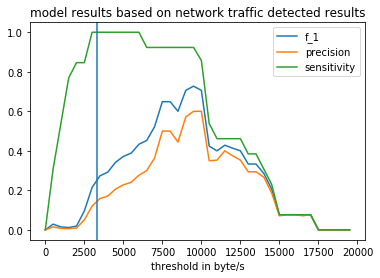

In [549]:
res = np.asarray(res)
data = pd.DataFrame({
    'threshold' : res[:, 3],
    'sensitivity': res[:, 1],
    'precision': res[:, 0],
    'f_1': res[:, 2]
})
#plt.plot("threshold", 'true_positvie', data)
# plt.plot(res[:, 3], res[:, 0])
# plt.plot(res[:, 3], res[:, 2])
plt.plot('threshold', 'f_1', data=data)
plt.plot('threshold', 'precision', data=data)
plt.plot('threshold', 'sensitivity', data=data)
plt.legend()
plt.xlabel('threshold in byte/s')
plt.title('')
plt.axvline(3317)
plt.title('model results based on network traffic detected results')

In [496]:
res[:, ]

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.53256705e-02, 3.07692308e-01, 2.91970803e-02, 5.00000000e+02],
       [7.67543860e-03, 5.38461538e-01, 1.51351351e-02, 1.00000000e+03],
       [6.10873549e-03, 7.69230769e-01, 1.21212121e-02, 1.50000000e+03],
       [9.75177305e-03, 8.46153846e-01, 1.92813322e-02, 2.00000000e+03],
       [5.06912442e-02, 8.46153846e-01, 9.56521739e-02, 2.50000000e+03],
       [1.20370370e-01, 1.00000000e+00, 2.14876033e-01, 3.00000000e+03],
       [1.58536585e-01, 1.00000000e+00, 2.73684211e-01, 3.50000000e+03],
       [1.71052632e-01, 1.00000000e+00, 2.92134831e-01, 4.00000000e+03],
       [2.06349206e-01, 1.00000000e+00, 3.42105263e-01, 4.50000000e+03],
       [2.28070175e-01, 1.00000000e+00, 3.71428571e-01, 5.00000000e+03],
       [2.40740741e-01, 1.00000000e+00, 3.88059701e-01, 5.50000000e+03],
       [2.76595745e-01, 1.00000000e+00, 4.33333333e-01, 6.00000000e+03],
       [3.00000000e-01, 9.23076923e-01, 4.52830189e

In [252]:
total_hit = 0
total_guess = 0
total_ground = 0
for key_name in file_name_computed_activated_time.keys():
    total_ground += 1
#     print(file_name_activated_time.get(key_name))
#     print(file_name_computed_activated_time.get(key_name))
    ground_tuple = file_name_activated_time.get(key_name)
    for estimate_tuple in file_name_computed_activated_time.get(key_name):
        total_guess += 1
        if is_time_intuple(ground_tuple, estimate_tuple):
            print(key_name, ground_tuple, estimate_tuple)
            total_hit += 1

[V1.Ep5] Dear White People - Chapter V (661, 661) [662.175306, 662.186439]
[S7.Ep18] The West Wing - Requiem (1929, 1929) [1930.4013120000002, 1930.402301]
[S9.Ep21] The Office (U.S.) - Livin' the Dream (2269, 2269) [2269.773904, 2269.782037]
[V1.Ep9] Dear White People - Chapter IX (667, 667) [667.580882, 667.580962]
[S7.Ep15] Gilmore Girls - I'm a Kayak, Hear Me Roar (2490, 2490) [2491.3350530000002, 2492.033527]
[S6.Ep3] The L Word - LMFAO (1152, 1152) [1152.657366, 1152.668605]
[S3.Ep2] Narcos - The Cali KGB (1326, 1326) [1327.040381, 1327.051817]
[S7.Ep19] The West Wing - Transition (463, 463) [463.99537999999995, 464.079279]
[S3.Ep10] Narcos - Going Back to Cali (1580, 1580) [1580.79831, 1580.819183]
[S7.Ep13] The West Wing - The Cold (1352, 1352) [1353.591536, 1353.6136609999999]
[S7.Ep21] The West Wing - Institutional Memory (955, 955) [955.6041439999999, 955.6103130000001]
[S3.Ep18] Riverdale - Chapter Fifty-Three - 'Jawbreaker' (17, 17) [18.522263, 18.522353]
[S12.Ep1] The Big

In [253]:
print("false positive:", (total_guess - total_hit)/total_guess, "TP:", (total_hit)/total_guess)

false positive: 0.7719298245614035 TP: 0.22807017543859648


In [235]:
total_ground

13

In [238]:
total_hit

12

In [239]:
total_guess

24

In [222]:
for name, activations in file_name_activated_time.items():
    s, t = activations
    if name not in key_name_df:
        continue
    df = key_name_df[name]
    print(max(df[(df.time >= s - 1) & (df.time <= t + 2)].speed), (s, t))

6171.333333333333 (17, 17)
14745.5 (1352, 1352)
7087.0 (1580, 1580)
10205.8 (1152, 1152)
10085.75 (2269, 2269)
10204.6 (955, 955)
9679.8 (1929, 1929)
14938.75 (463, 463)
10442.5 (1326, 1326)
7637.4 (661, 661)
12520.75 (667, 667)
14150.0 (2490, 2490)
17270.0 (374, 374)


In [170]:
key_name_df.keys()

dict_keys(['[V1.Ep5] Dear White People - Chapter V', '[S7.Ep18] The West Wing - Requiem', "[S9.Ep21] The Office (U.S.) - Livin' the Dream", '[V1.Ep9] Dear White People - Chapter IX', "[S7.Ep15] Gilmore Girls - I'm a Kayak, Hear Me Roar", '[S6.Ep3] The L Word - LMFAO', '[S3.Ep2] Narcos - The Cali KGB', '[S7.Ep19] The West Wing - Transition', '[S3.Ep10] Narcos - Going Back to Cali', '[S7.Ep13] The West Wing - The Cold', '[S7.Ep21] The West Wing - Institutional Memory', "[S3.Ep18] Riverdale - Chapter Fifty-Three - 'Jawbreaker'", '[S12.Ep1] The Big Bang Theory - The Conjugal Configuration'])

In [171]:
ground_df_speeds.keys()

dict_keys(['/Users/kuangwenyi/Documents/Development/master-research/activations-final1a/[V1.Ep5] Dear White People - Chapter V/invoke_nodup.csv', '/Users/kuangwenyi/Documents/Development/master-research/activations-final1a/[S7.Ep18] The West Wing - Requiem/invoke_nodup.csv', "/Users/kuangwenyi/Documents/Development/master-research/activations-final1a/[S9.Ep21] The Office (U.S.) - Livin' the Dream/invoke_nodup.csv", '/Users/kuangwenyi/Documents/Development/master-research/activations-final1a/[V1.Ep9] Dear White People - Chapter IX/invoke_nodup.csv', "/Users/kuangwenyi/Documents/Development/master-research/activations-final1a/[S7.Ep15] Gilmore Girls - I'm a Kayak, Hear Me Roar/invoke_nodup.csv", '/Users/kuangwenyi/Documents/Development/master-research/activations-final1a/[S6.Ep3] The L Word - LMFAO/invoke_nodup.csv', '/Users/kuangwenyi/Documents/Development/master-research/activations-final1a/[S3.Ep2] Narcos - The Cali KGB/invoke_nodup.csv', '/Users/kuangwenyi/Documents/Development/maste

In [366]:
camera_result_path = "/Users/kuangwenyi/Documents/Development/master-research/activations-final1a/results-final1a/results-camera-final1a-filtered.txt"

In [388]:
file_name_camera_activated_time = defaultdict(list)
with open(camera_result_path) as f:
    last_line = ""
    for line in f:
        if "/" in line:
            file_name = line.split('/')[3]
            start_flag = True
        if 'invoke' in line:
            file_name_camera_activated_time[file_name].append(eval(line.split(':')[1]))

In [395]:
ground_camera_csv_paths = []
for p in seprate_paths['invoke_nodup']:
    if p.split('/')[7] in file_name_camera_activated_time:
        print(p.split('/')[7])
        ground_camera_csv_paths.append(p)

[V1.Ep5] Dear White People - Chapter V
[S7.Ep18] The West Wing - Requiem
[S9.Ep21] The Office (U.S.) - Livin' the Dream
[V1.Ep9] Dear White People - Chapter IX
[S7.Ep15] Gilmore Girls - I'm a Kayak, Hear Me Roar
[S6.Ep3] The L Word - LMFAO
[S3.Ep2] Narcos - The Cali KGB
[S7.Ep19] The West Wing - Transition
[S3.Ep10] Narcos - Going Back to Cali
[S7.Ep13] The West Wing - The Cold
[S7.Ep21] The West Wing - Institutional Memory
[S12.Ep1] The Big Bang Theory - The Conjugal Configuration


In [396]:
ground_camera_df_speeds = {}
for path in ground_camera_csv_paths:
    ground_camera_df_speeds[path.split('/')[7]] = generate_speeds_conlumns(path)

['Local' 'Local' 'microsoft.com' ... 'Local' 'microsoft.com' 'Local']
['Local' 'Local' 'microsoft.com' ... 'microsoft.com' 'Local' 'Local']
['Local' 'microsoft.com' 'Local' ... 'Local' 'microsoft.com' 'Local']
['Local' 'microsoft.com' 'Local' ... 'Local' 'microsoft.com' 'Local']
['Local' 'microsoft.com' 'Local' ... 'microsoft.com' 'microsoft.com'
 'Local']
['Local' 'microsoft.com' 'Local' ... 'Local' 'microsoft.com' 'Local']
['Local' 'microsoft.com' 'Local' ... 'Local' 'microsoft.com' 'Local']
['Local' 'microsoft.com' 'Local' ... 'Local' 'microsoft.com' 'Local']
['Local' 'Local' 'microsoft.com' ... 'Local' 'microsoft.com' 'Local']
['Local' 'Local' 'Local' ... 'Local' 'microsoft.com' 'Local']
['microsoft.com' 'Local' 'microsoft.com' ... 'Local' 'microsoft.com'
 'Local']
['Local' 'Local' 'microsoft.com' ... 'Local' 'microsoft.com' 'Local']


In [450]:
temp = ground_camera_df_speeds['[V1.Ep5] Dear White People - Chapter V'] 
get_activation_time(temp, 15000)

[None]

In [400]:
file_name_camera_activated_time['[V1.Ep5] Dear White People - Chapter V']

[(664, 665)]

In [470]:
def compute_fp_fn_camera(threshold, camera_df_speeds, camera_grounds_times):
    file_name_computed_activated_time = {}
    total_postive = 0
    
    for name in camera_df_speeds.keys():
        df = camera_df_speeds[name]
        file_name_computed_activated_time[name] = get_activation_time(df, threshold)
        total_postive += len(file_name_computed_activated_time[name])
    
    true_postive = 0
    false_nagetive = 0
    total_ground = 0
    
    for file_name in camera_df_speeds:
        ground_truth_times = camera_grounds_times.get(file_name)
        for ground_truth_activation in ground_truth_times:
            hit = 0
            total_ground += 1
            for predicted_activation in file_name_computed_activated_time[file_name]:
                if predicted_activation and is_time_intuple(ground_truth_activation, predicted_activation):
                    true_postive += 1
                    hit = 1
            if hit != 1:
                false_nagetive += 1
    
#     false_postive_rate = (total_postive - true_postive)/(total_postive)
#     false_negative_rate = (false_nagetive)/(total_ground)
#     true_postive_rate = (true_postive)/total_postive
    precision = (true_postive)/(total_postive)
    sensitivity = (true_postive)/(true_postive + false_nagetive)
    
    #print(precision , sensitivity, true_postive, false_nagetive, file_name_computed_activated_time, threshold)
    f_one_score = (2 * true_postive)/(2 * true_postive + (total_postive - true_postive) + false_nagetive)
    return precision, sensitivity, f_one_score
                    

Text(0.5, 1.0, 'model results based on camera detected results')

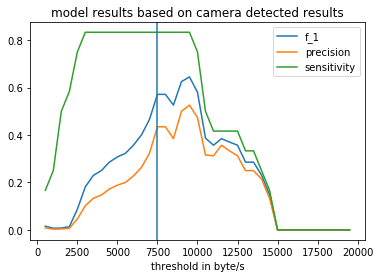

In [585]:
compute_fp_fn_camera(8000, ground_camera_df_speeds, file_name_camera_activated_time)
res = []
for threshold in range(500, 20000, 500):
    res.append((*compute_fp_fn_camera(threshold, ground_camera_df_speeds, file_name_camera_activated_time), threshold))
res = np.asarray(res)
data = pd.DataFrame({
    'threshold' : res[:, 3],
    'sensitivity': res[:, 1],
    'precision': res[:, 0],
    'f_1': res[:, 2]
})
#plt.plot("threshold", 'true_positvie', data)
# plt.plot(res[:, 3], res[:, 0])
# plt.plot(res[:, 3], res[:, 2])
plt.plot('threshold', 'f_1', data=data)
plt.plot('threshold', 'precision', data=data)
plt.plot('threshold', 'sensitivity', data=data)
plt.legend()
plt.xlabel('threshold in byte/s')
plt.axvline(7500)
plt.title('model results based on camera detected results')

Text(0.5, 1.0, 'model results based on camera detected results')

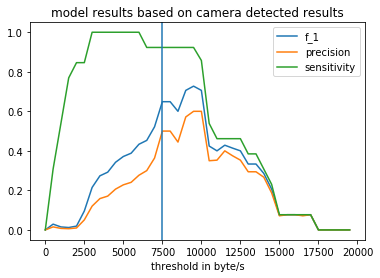

In [589]:
res = np.asarray(res)
data = pd.DataFrame({
    'threshold' : res[:, 3],
    'sensitivity': res[:, 1],
    'precision': res[:, 0],
    'f_1': res[:, 2]
})
#plt.plot("threshold", 'true_positvie', data)
# plt.plot(res[:, 3], res[:, 0])
# plt.plot(res[:, 3], res[:, 2])
plt.plot('threshold', 'f_1', data=data)
plt.plot('threshold', 'precision', data=data)
plt.plot('threshold', 'sensitivity', data=data)
plt.legend()
plt.xlabel('threshold in byte/s')
plt.axvline(7500)
plt.title('model results based on camera detected results')